In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.width', 4000)
pd.set_option('display.max_colwidth', 4000)



In [2]:
features_description=pd.read_csv(r'NUSW-NB15_features.csv' ,encoding='cp1252')
features_description

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,"Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)"
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [3]:
data=pd.read_csv('UNSW_NB15_training-set.csv')

In [4]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [5]:
list(data.columns)

['id',
 'dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'attack_cat',
 'label']

In [6]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [7]:
df= data.copy()

## Data preparation and data cleaning


Firstly, we will delete ID column becuase it is nominal & unique for each row. Also, we will delete col "attack_cat" as our goal here is to predcit whether this is an attach or not. We are not intereseted her to prdict the types of the attacks. 

In [8]:
cols_to_delete=['id','attack_cat']

In [9]:
df.shape

(82332, 45)

In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [11]:
df[df.isnull()].mean()

id                  NaN
dur                 NaN
proto               NaN
service             NaN
state               NaN
spkts               NaN
dpkts               NaN
sbytes              NaN
dbytes              NaN
rate                NaN
sttl                NaN
dttl                NaN
sload               NaN
dload               NaN
sloss               NaN
dloss               NaN
sinpkt              NaN
dinpkt              NaN
sjit                NaN
djit                NaN
swin                NaN
stcpb               NaN
dtcpb               NaN
dwin                NaN
tcprtt              NaN
synack              NaN
ackdat              NaN
smean               NaN
dmean               NaN
trans_depth         NaN
response_body_len   NaN
ct_srv_src          NaN
ct_state_ttl        NaN
ct_dst_ltm          NaN
ct_src_dport_ltm    NaN
ct_dst_sport_ltm    NaN
ct_dst_src_ltm      NaN
is_ftp_login        NaN
ct_ftp_cmd          NaN
ct_flw_http_mthd    NaN
ct_src_ltm          NaN
ct_srv_dst      

In [12]:
df[df.isnull()].count()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [13]:
df[df==0].sum()

id                   0.0
dur                  0.0
proto                  0
service                0
state                  0
spkts                0.0
dpkts                0.0
sbytes               0.0
dbytes               0.0
rate                 0.0
sttl                 0.0
dttl                 0.0
sload                0.0
dload                0.0
sloss                0.0
dloss                0.0
sinpkt               0.0
dinpkt               0.0
sjit                 0.0
djit                 0.0
swin                 0.0
stcpb                0.0
dtcpb                0.0
dwin                 0.0
tcprtt               0.0
synack               0.0
ackdat               0.0
smean                0.0
dmean                0.0
trans_depth          0.0
response_body_len    0.0
ct_srv_src           0.0
ct_state_ttl         0.0
ct_dst_ltm           0.0
ct_src_dport_ltm     0.0
ct_dst_sport_ltm     0.0
ct_dst_src_ltm       0.0
is_ftp_login         0.0
ct_ftp_cmd           0.0
ct_flw_http_mthd     0.0


In [14]:
df[df.duplicated()].shape

(0, 45)

We do not have any null values or zeros. We have around  28380 duplicatd rows. We will not drop them as they might be repeated attack. 

In [15]:
for i in df.columns:
    print(f"{i} ->")
    print ( f" number of unique values of feature {i} is: ", df[i].nunique())
    print (i, " : ", df[i].unique())
    print()

id ->
 number of unique values of feature id is:  82332
id  :  [    1     2     3 ... 82330 82331 82332]

dur ->
 number of unique values of feature dur is:  39888
dur  :  [1.100000e-05 8.000000e-06 5.000000e-06 ... 8.119140e-01 5.167410e+00
 1.106101e+00]

proto ->
 number of unique values of feature proto is:  131
proto  :  ['udp' 'arp' 'tcp' 'igmp' 'ospf' 'sctp' 'gre' 'ggp' 'ip' 'ipnip' 'st2'
 'argus' 'chaos' 'egp' 'emcon' 'nvp' 'pup' 'xnet' 'mux' 'dcn' 'hmp' 'prm'
 'trunk-1' 'trunk-2' 'xns-idp' 'leaf-1' 'leaf-2' 'irtp' 'rdp' 'netblt'
 'mfe-nsp' 'merit-inp' '3pc' 'idpr' 'ddp' 'idpr-cmtp' 'tp++' 'ipv6' 'sdrp'
 'ipv6-frag' 'ipv6-route' 'idrp' 'mhrp' 'i-nlsp' 'rvd' 'mobile' 'narp'
 'skip' 'tlsp' 'ipv6-no' 'any' 'ipv6-opts' 'cftp' 'sat-expak' 'ippc'
 'kryptolan' 'sat-mon' 'cpnx' 'wsn' 'pvp' 'br-sat-mon' 'sun-nd' 'wb-mon'
 'vmtp' 'ttp' 'vines' 'nsfnet-igp' 'dgp' 'eigrp' 'tcf' 'sprite-rpc' 'larp'
 'mtp' 'ax.25' 'ipip' 'aes-sp3-d' 'micp' 'encap' 'pri-enc' 'gmtp' 'ifmp'
 'pnni' 'qnx' 'scps'

 number of unique values of feature dwin is:  14
dwin  :  [  0 255  81 160  77 171 137 164  27  33 209  12  46 125]

tcprtt ->
 number of unique values of feature tcprtt is:  26130
tcprtt  :  [0.       0.148966 0.185096 ... 0.237125 0.140691 0.173208]

synack ->
 number of unique values of feature synack is:  24934
synack  :  [0.       0.079731 0.095516 ... 0.083616 0.117467 0.100191]

ackdat ->
 number of unique values of feature ackdat is:  24020
ackdat  :  [0.       0.069235 0.08958  ... 0.119658 0.05986  0.073017]

smean ->
 number of unique values of feature smean is:  1282
smean  :  [ 248  881  534 ...  515 1015  523]

dmean ->
 number of unique values of feature dmean is:  1222
dmean  :  [   0   45   44 ...  610 1377 1033]

trans_depth ->
 number of unique values of feature trans_depth is:  8
trans_depth  :  [  0   1 131   2   9   3   4   8]

response_body_len ->
 number of unique values of feature response_body_len is:  1190
response_body_len  :  [   0  184  187 ...  192  147 1

In [16]:
df[df['is_ftp_login']==2].index


Int64Index([9434, 11136, 11139, 11811], dtype='int64')

is_ftp_login is binary feature, it should be either 0 or 1. So we will drop the rows having different values which is having value 2 in our datasets.


In [17]:
## is_ftp_login is binary feature, it should be either 0 or 1
df = df.drop(index=df[df['is_ftp_login']==2].index)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer


In [19]:
cols_to_delete.append('proto')

In [20]:
cols_to_delete

['id', 'attack_cat', 'proto']

Converting proto to numerical values will increase the dimensions of the dataset espcially that 
this feature has about 131 different values, so I deciced to drop it.

In [21]:
## dropping ['id', 'attack_cat', 'proto']
df=df.drop(cols_to_delete, axis=1)


In [22]:
df.shape

(82328, 42)

In [23]:
for i in df.columns:
    print(f"{i} ->")
    print ( f" number of unique values of feature {i} is: ", df[i].nunique())
    print (i, " : ", df[i].unique())
    print()

dur ->
 number of unique values of feature dur is:  39887
dur  :  [1.100000e-05 8.000000e-06 5.000000e-06 ... 8.119140e-01 5.167410e+00
 1.106101e+00]

service ->
 number of unique values of feature service is:  13
service  :  ['-' 'http' 'ftp' 'ftp-data' 'smtp' 'pop3' 'dns' 'snmp' 'ssl' 'dhcp' 'irc'
 'radius' 'ssh']

state ->
 number of unique values of feature state is:  7
state  :  ['INT' 'FIN' 'REQ' 'ACC' 'CON' 'RST' 'CLO']

spkts ->
 number of unique values of feature spkts is:  420
spkts  :  [    2     1    10    14    22    20    18    12    16     8     6     4
   202    28   246    34    26   224    38    36    48   150    40   116
  5416    24  4144   182   252  1642    60   232    62    90    50   136
    30    32   118    72    88    52    46    80   160   114   790    54
   130    76    78  3684   102   180    44     3  6874   154   284   112
   342    74    64   152    82   228   158   822   334   200    42   194
   146   144   106   108   262   240   268   372   322    5

 number of unique values of feature trans_depth is:  8
trans_depth  :  [  0   1 131   2   9   3   4   8]

response_body_len ->
 number of unique values of feature response_body_len is:  1190
response_body_len  :  [   0  184  187 ...  192  147 1492]

ct_srv_src ->
 number of unique values of feature ct_srv_src is:  57
ct_srv_src  :  [ 2  3  1  4  5 17 18  8 11 12  6 27 10  7  9 37 39 63 28 43 14 20 13 36
 22 29 19 15 24 59 30 35 41 45 21 47 38 48 23 25 32 44 26 33 16 34 42 49
 51 31 50 40 52 46 54 53 58]

ct_state_ttl ->
 number of unique values of feature ct_state_ttl is:  7
ct_state_ttl  :  [2 1 6 4 0 3 5]

ct_dst_ltm ->
 number of unique values of feature ct_dst_ltm is:  50
ct_dst_ltm  :  [ 1  2 18  4  9  3  5  8 19 20 11  6  7 14 15 10 12 35 13 24 16 42 30 17
 26 41 27 25 47 37 32 31 43 34 33 39 36 29 28 21 45 38 22 44 23 40 59 52
 50 48]

ct_src_dport_ltm ->
 number of unique values of feature ct_src_dport_ltm is:  50
ct_src_dport_ltm  :  [ 1  2  3  4 10 14 15  9  6  8  5 12  7 13 

In [24]:
categorical_cols=['service', 'state'  , 'is_ftp_login' , 'ct_ftp_cmd' , 'is_sm_ips_ports' ]

In [25]:
numerical_cols= list(df.columns.drop(['service', 'state'  , 'is_ftp_login' , 'ct_ftp_cmd' , 'is_sm_ips_ports' , 'label']))

In [26]:
numerical_cols

['dur',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst']

In [27]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.label
y_val = df_val.label
y_test = df_test.label



## EDA, feature importance analysis

In [28]:
df_full_train.label.value_counts()


1    36178
0    29684
Name: label, dtype: int64

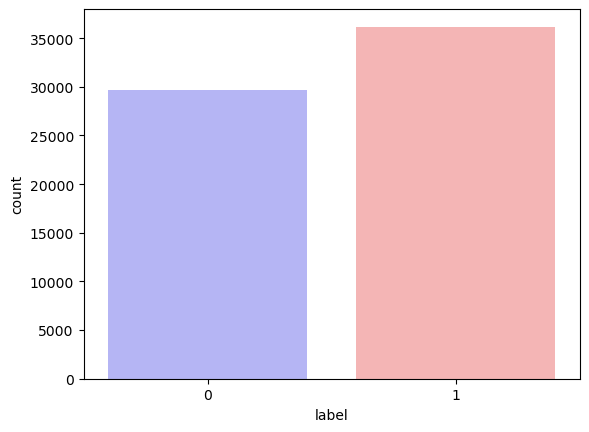

In [29]:
sns.countplot(x="label", data=df_full_train, palette="bwr")
plt.show()

array([[<AxesSubplot:title={'center':'dur'}>,
        <AxesSubplot:title={'center':'spkts'}>,
        <AxesSubplot:title={'center':'dpkts'}>,
        <AxesSubplot:title={'center':'sbytes'}>,
        <AxesSubplot:title={'center':'dbytes'}>,
        <AxesSubplot:title={'center':'rate'}>],
       [<AxesSubplot:title={'center':'sttl'}>,
        <AxesSubplot:title={'center':'dttl'}>,
        <AxesSubplot:title={'center':'sload'}>,
        <AxesSubplot:title={'center':'dload'}>,
        <AxesSubplot:title={'center':'sloss'}>,
        <AxesSubplot:title={'center':'dloss'}>],
       [<AxesSubplot:title={'center':'sinpkt'}>,
        <AxesSubplot:title={'center':'dinpkt'}>,
        <AxesSubplot:title={'center':'sjit'}>,
        <AxesSubplot:title={'center':'djit'}>,
        <AxesSubplot:title={'center':'swin'}>,
        <AxesSubplot:title={'center':'stcpb'}>],
       [<AxesSubplot:title={'center':'dtcpb'}>,
        <AxesSubplot:title={'center':'dwin'}>,
        <AxesSubplot:title={'center':'tcpr

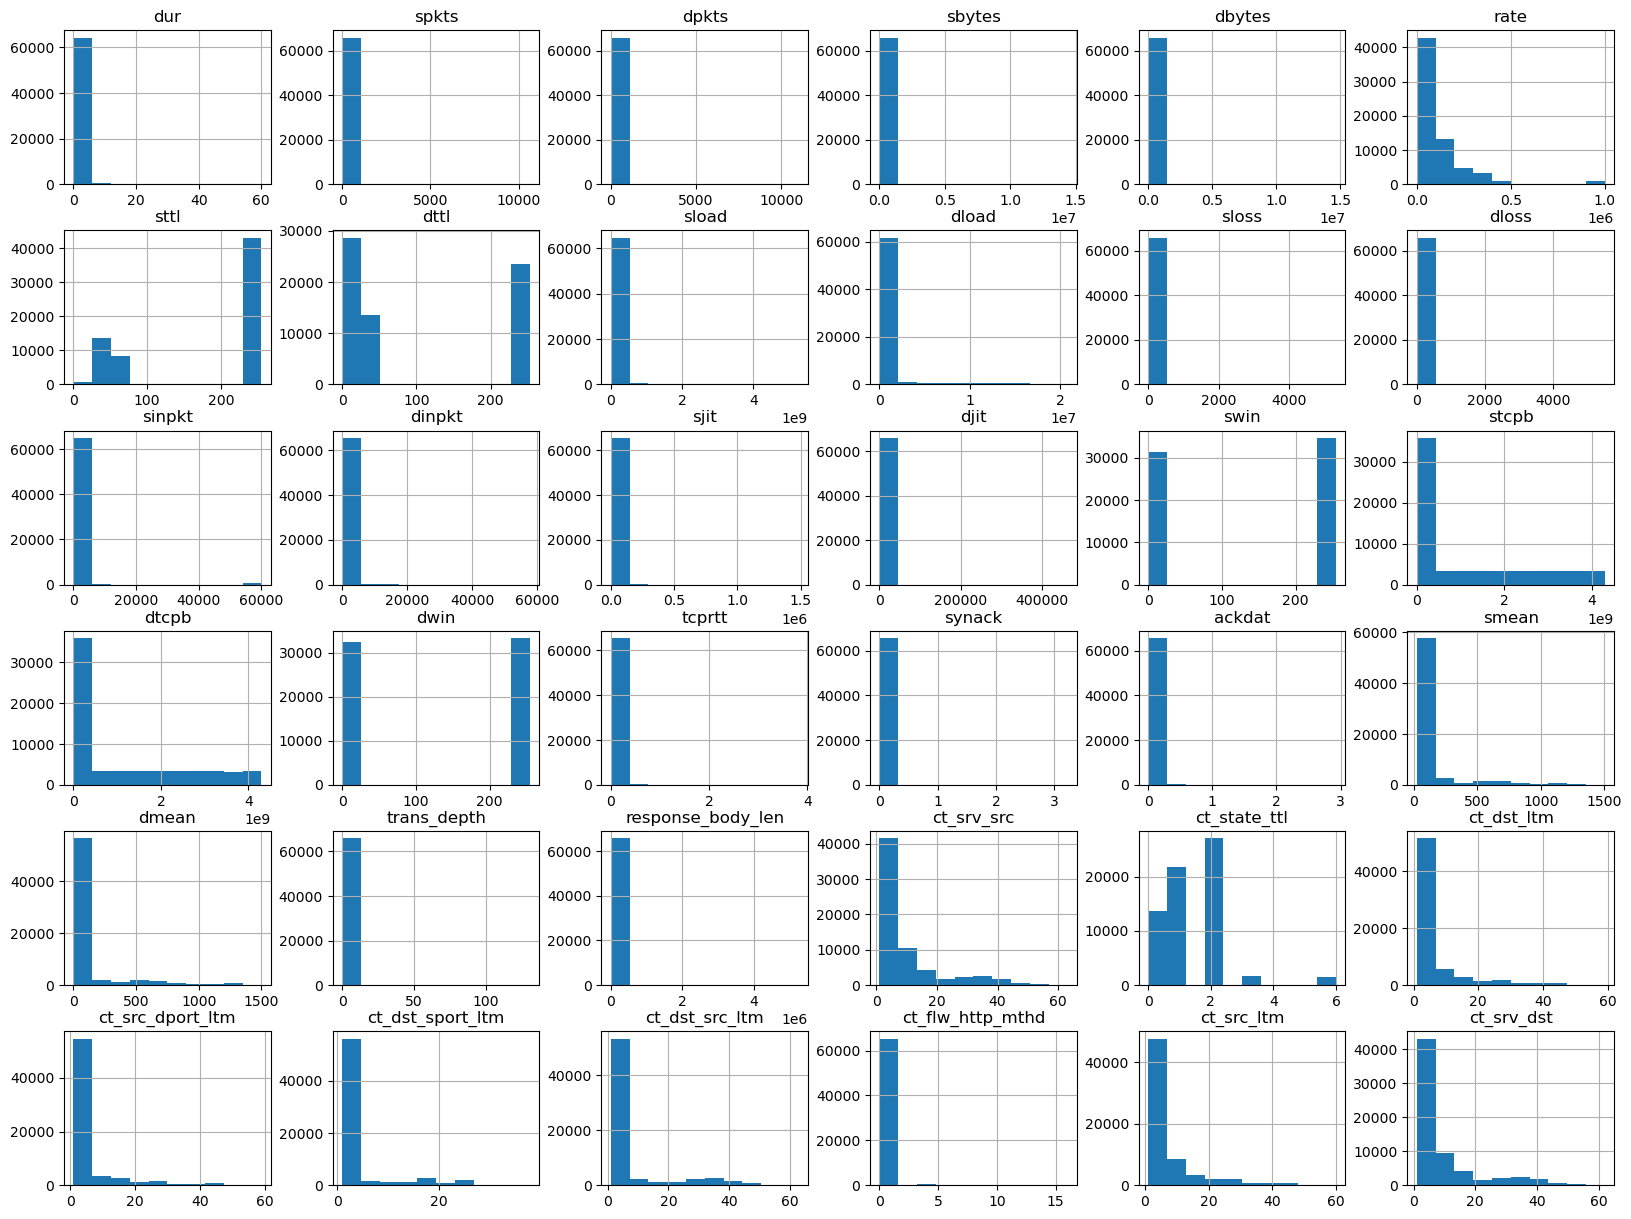

In [35]:
df_full_train[numerical_cols].hist(figsize=(20,15))

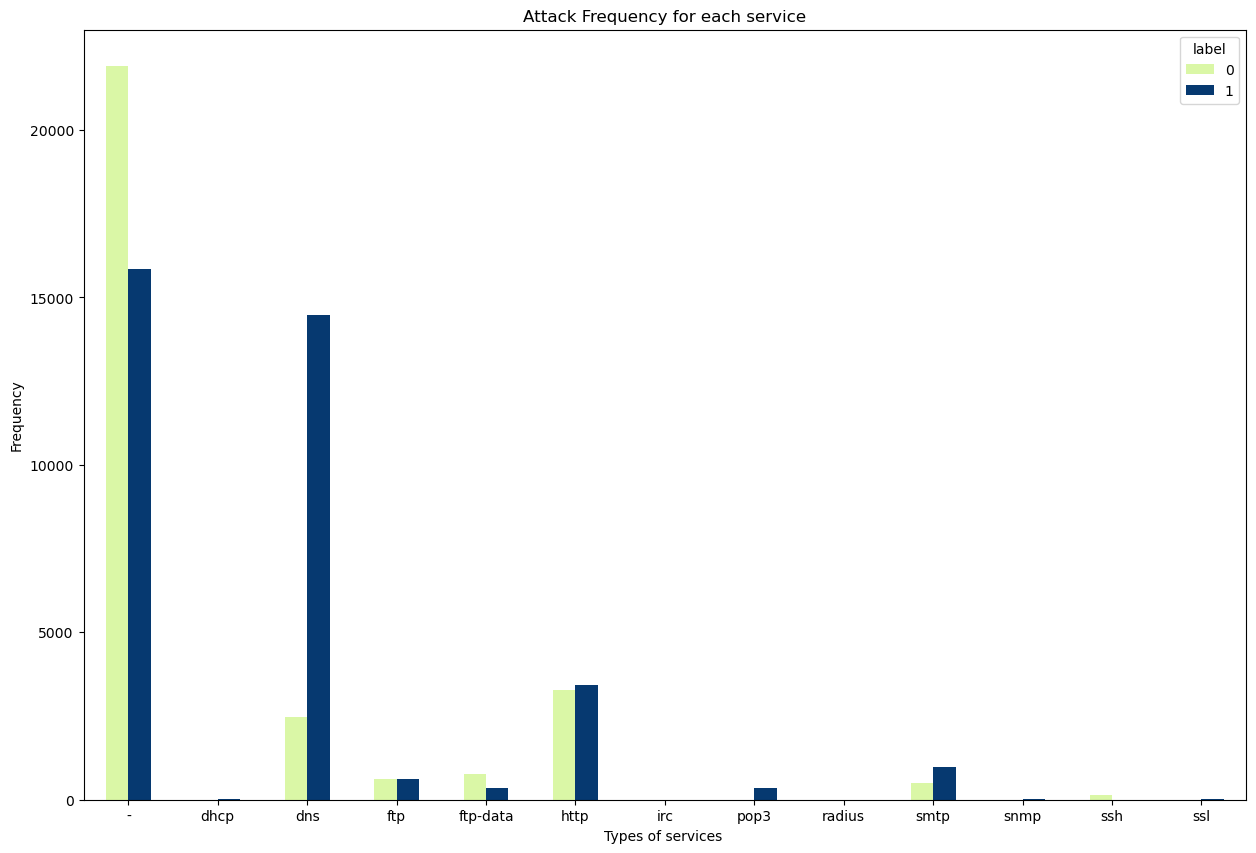

In [38]:
pd.crosstab(df_full_train.service,df_full_train.label).plot(kind="bar",figsize=(15,10),color=['#DAF7A6','#063970' ])
plt.title('Attack Frequency for each service')
plt.xlabel('Types of services ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

- Most services used by the attackers are dns and http. Also, we can notice that service type is unknown for a lot of attacks. 

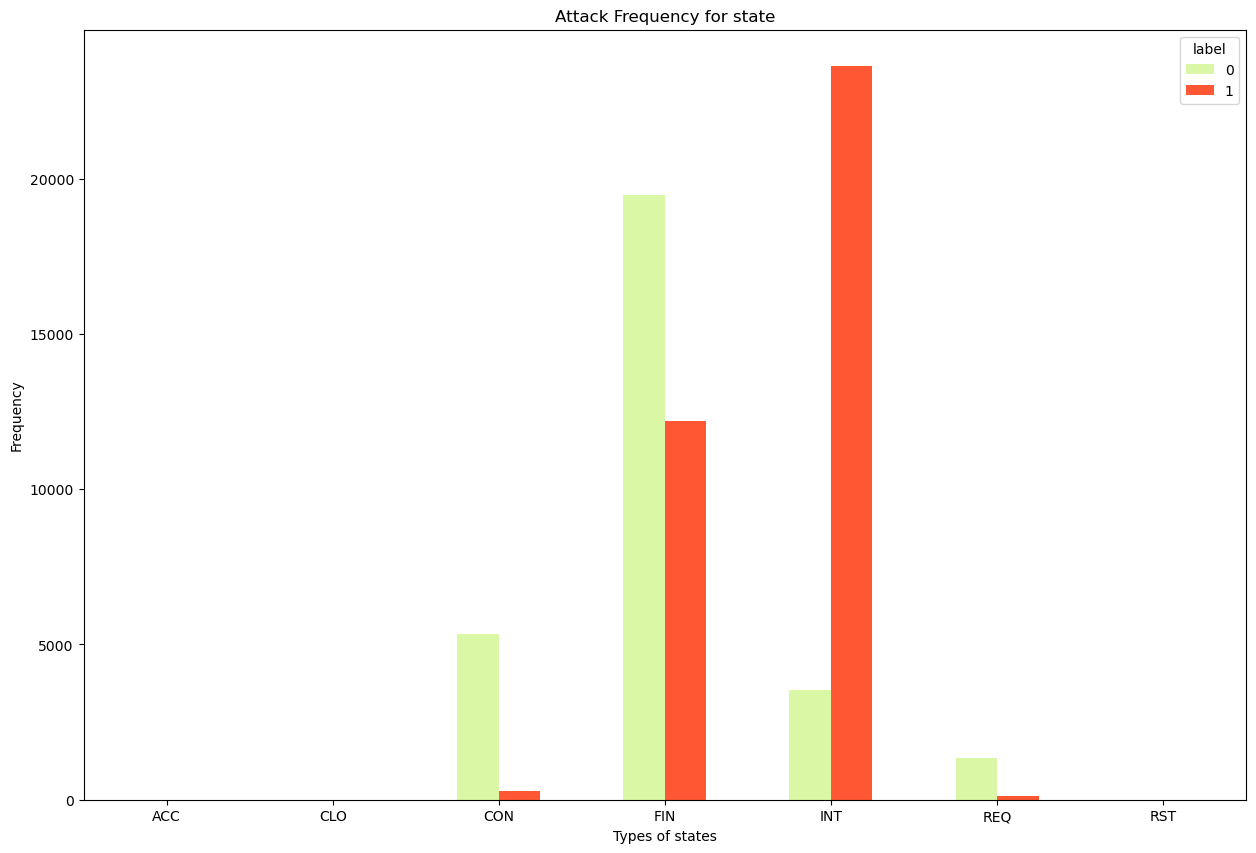

In [41]:
pd.crosstab(df_full_train.state,df_full_train.label).plot(kind="bar",figsize=(15,10),color=['#DAF7A6','#FF5733' ])
plt.title('Attack Frequency for state')
plt.xlabel('Types of states')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

- INT state has the highest number of attackes, and FIN has the second highest numbers of attackes. 

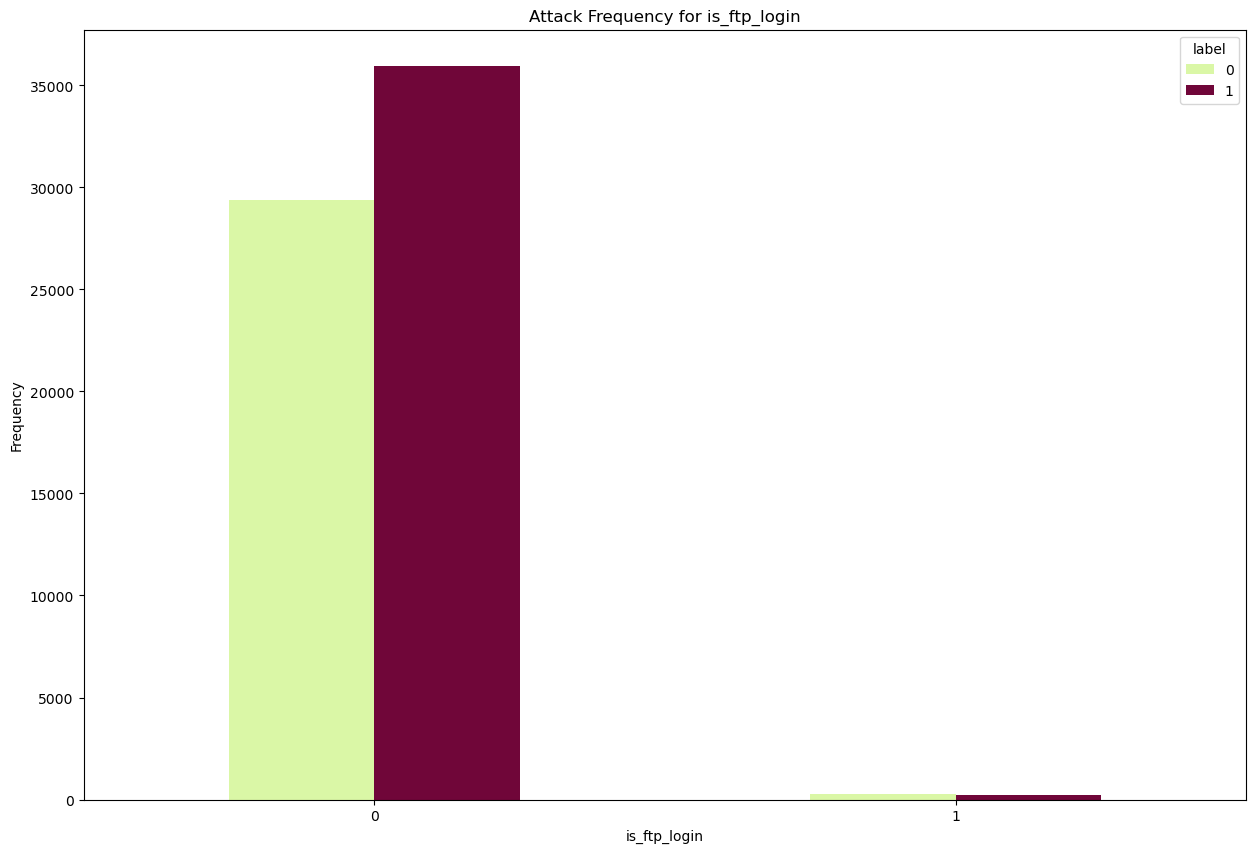

In [42]:
pd.crosstab(df_full_train.is_ftp_login,df_full_train.label).plot(kind="bar",figsize=(15,10),color=['#DAF7A6','#700639' ])
plt.title('Attack Frequency for is_ftp_login')
plt.xlabel('is_ftp_login')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

is_ftp_login -- If the ftp session is accessed by user and password then 1 else 0. We can see that the ftp session for majority of the attacks were not accessed by user and password


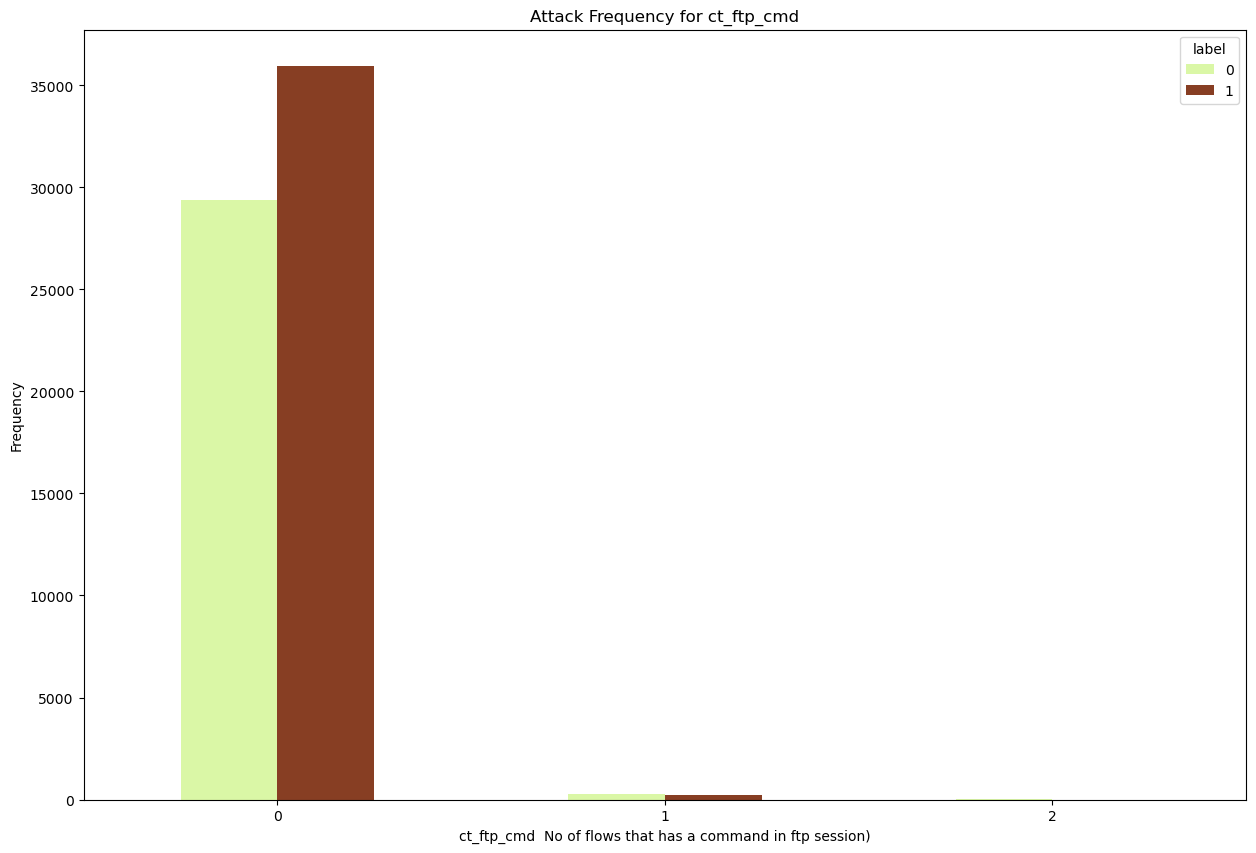

In [43]:
pd.crosstab(df_full_train.ct_ftp_cmd,df_full_train.label).plot(kind="bar",figsize=(15,10),color=['#DAF7A6','#873e23' ])
plt.title('Attack Frequency for ct_ftp_cmd')
plt.xlabel('ct_ftp_cmd  No of flows that has a command in ftp session)')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

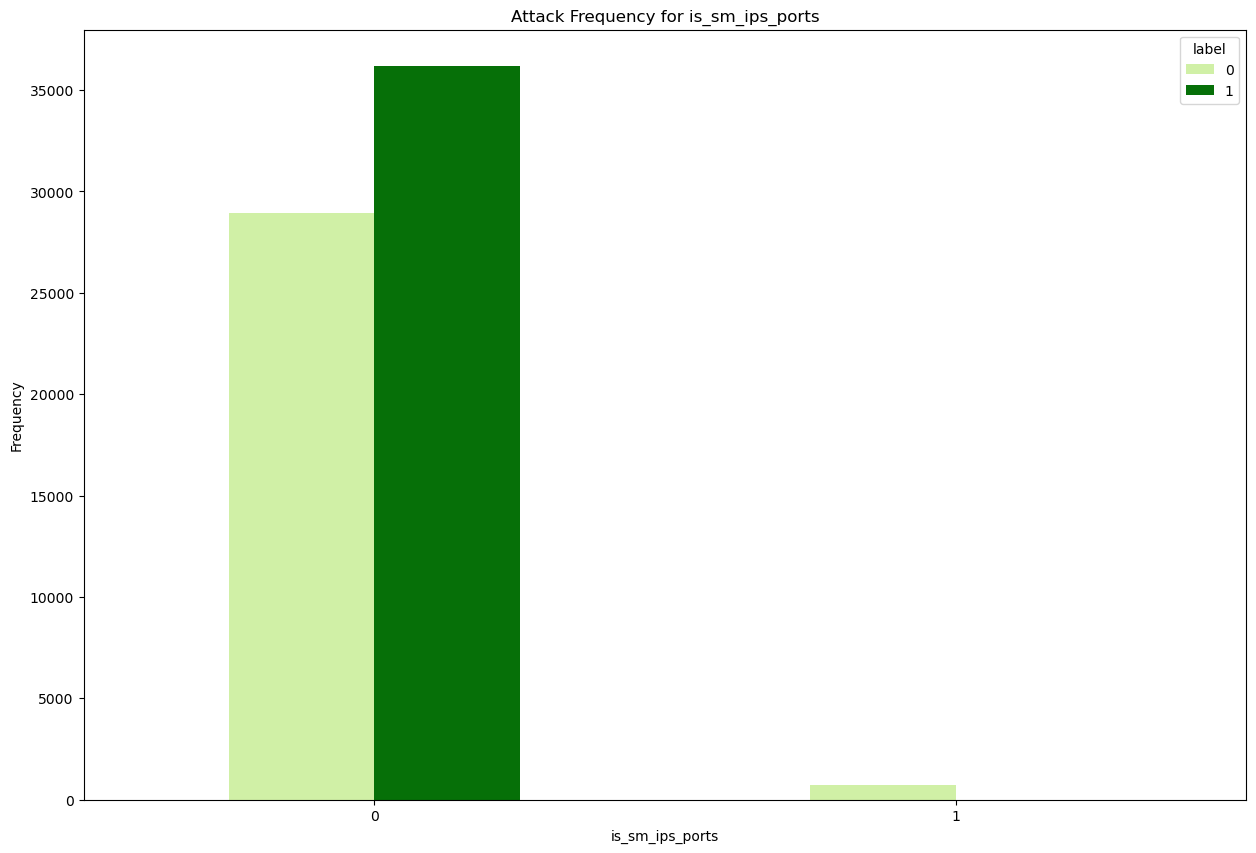

In [44]:
pd.crosstab(df_full_train.is_sm_ips_ports,df_full_train.label).plot(kind="bar",figsize=(15,10),color=['#D0F0A6','#067008' ])
plt.title('Attack Frequency for is_sm_ips_ports')
plt.xlabel('is_sm_ips_ports')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

is_sm_ips_ports >> If source (1) and destination (3)IP addresses equal and port numbers (2)(4) equal then, this variable takes value 1 else 0. <br>

We can see that is_sm_ips_ports is zero for all attackes. 


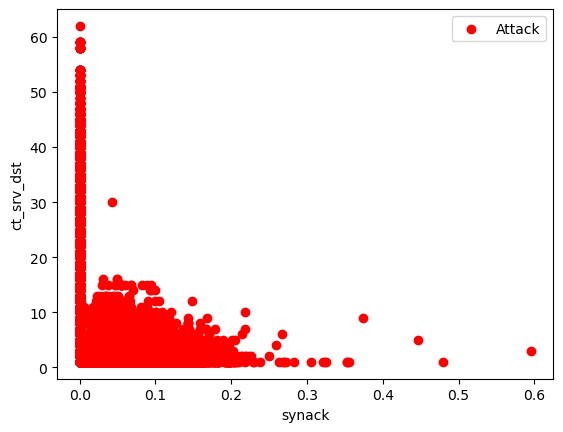

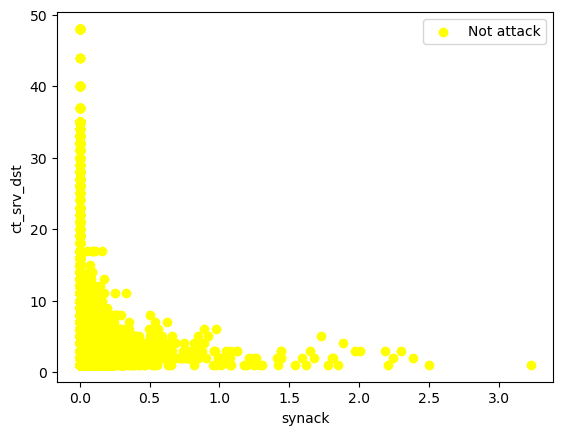

In [45]:
plt.scatter(x=df_full_train.synack[df_full_train.label==1], y=df_full_train.ct_srv_dst[(df_full_train.label==1)], c="red")
plt.legend(["Attack"])
plt.xlabel("synack")
plt.ylabel("ct_srv_dst")
plt.show()
plt.scatter(x=df_full_train.synack[df_full_train.label==0], y=df_full_train.ct_srv_dst[(df_full_train.label==0)], c="yellow")
plt.legend(["Not attack"])
plt.xlabel("synack")
plt.ylabel("ct_srv_dst")
plt.show()

<AxesSubplot:>

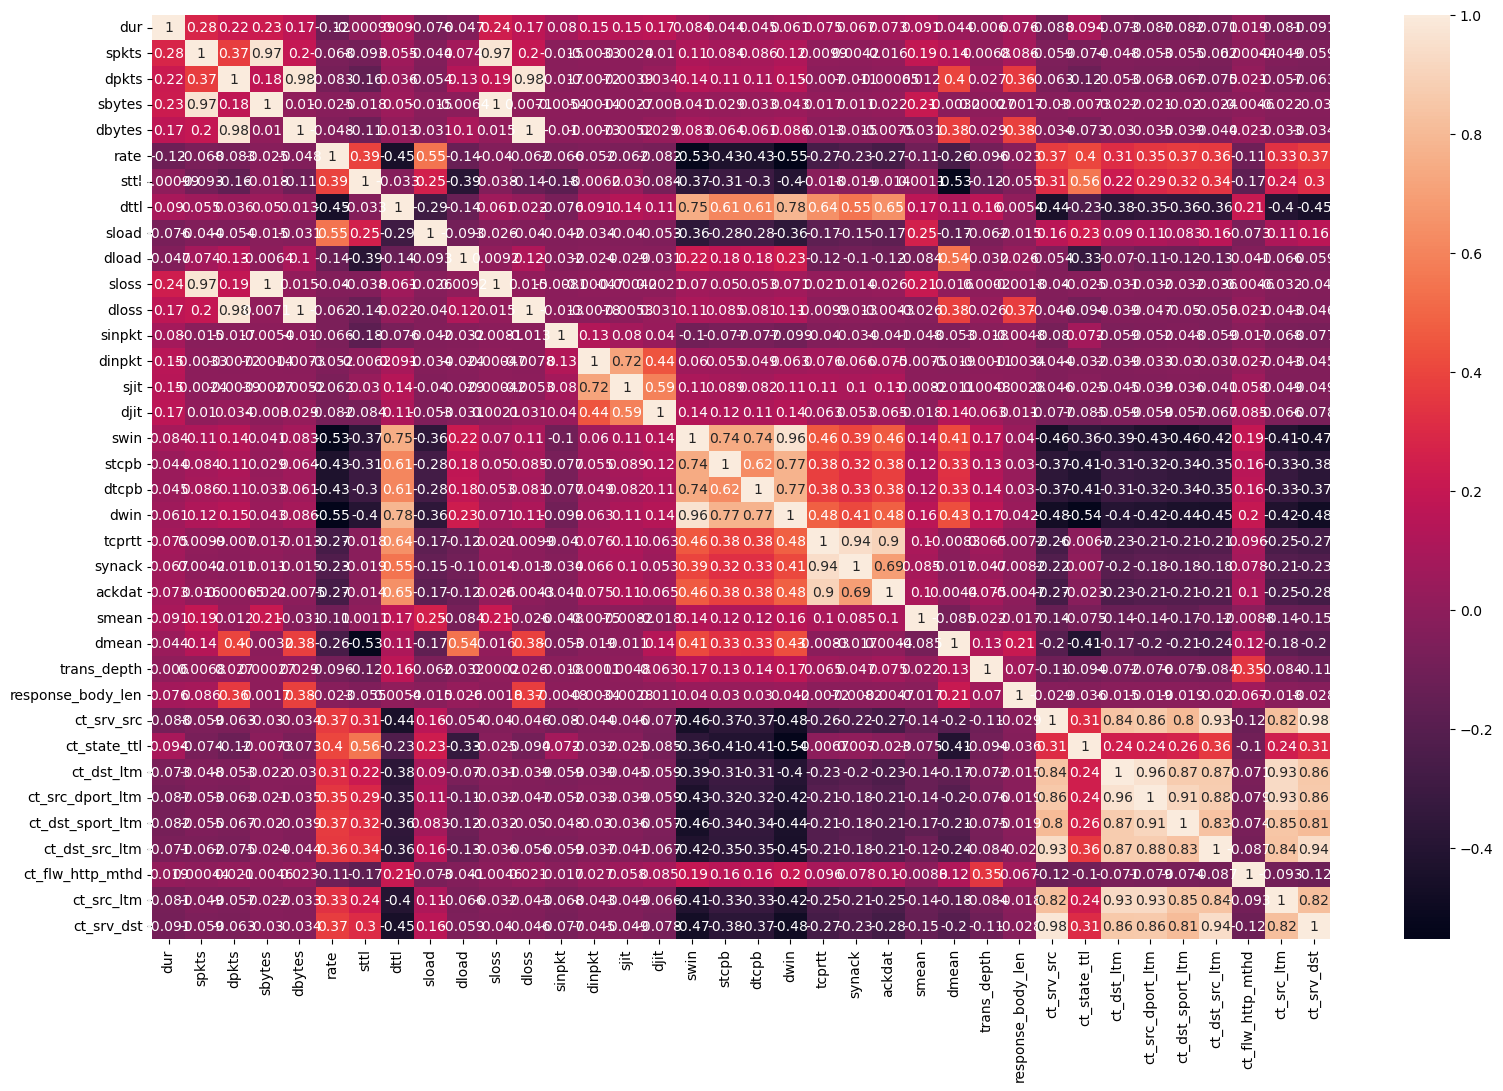

In [46]:
cor=df[numerical_cols].corr()

plt.figure(figsize=(19,12))
sns.heatmap(data=cor, annot=True)

In [47]:
del df_train['label']
del df_val['label']
del df_test['label']

In [48]:
### Converting categorical features to numerical data using DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_cols].to_dict(orient='records')
X_train_categorical = dv.fit_transform(train_dict )

val_dict = df_val[categorical_cols].to_dict(orient='records')
X_val_categorical = dv.transform(val_dict)

test_dict = df_test[categorical_cols].to_dict(orient='records')
X_test_categorical = dv.transform(test_dict)

In [49]:
len(dv.feature_names_)

23

We have a lot of features in this dataset, so we need to decrease the dimensionality and to take only the most important features. <br>
We will use PCA to reduce the dimentionality

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA


In [51]:
##standardized numerical data

sc = StandardScaler()
X_std_train_numerical = sc.fit_transform(df_train[numerical_cols])
X_std_val_numerical  = sc.transform(df_val[numerical_cols])
X_std_test_numerical  = sc.transform(df_test[numerical_cols])  


In [52]:
### combing the numerial arrays & categorical arrays
X_std_train = np.concatenate((X_train_categorical,X_std_train_numerical) , axis=1)
X_std_val = np.concatenate((X_val_categorical,X_std_val_numerical) , axis=1)
X_std_test = np.concatenate((X_test_categorical,X_std_test_numerical) , axis=1)


In [53]:
X_std_train.shape ,  X_std_val.shape  , X_std_test.shape

((49396, 59), (16466, 59), (16466, 59))

In [54]:
pca = sklearnPCA()
sklearn_pca = pca.fit(X_std_train)


In [55]:
train_pca = sklearn_pca.transform(X_std_train)
val_pca = sklearn_pca.transform(X_std_val)

Text(0, 0.5, 'Variance')

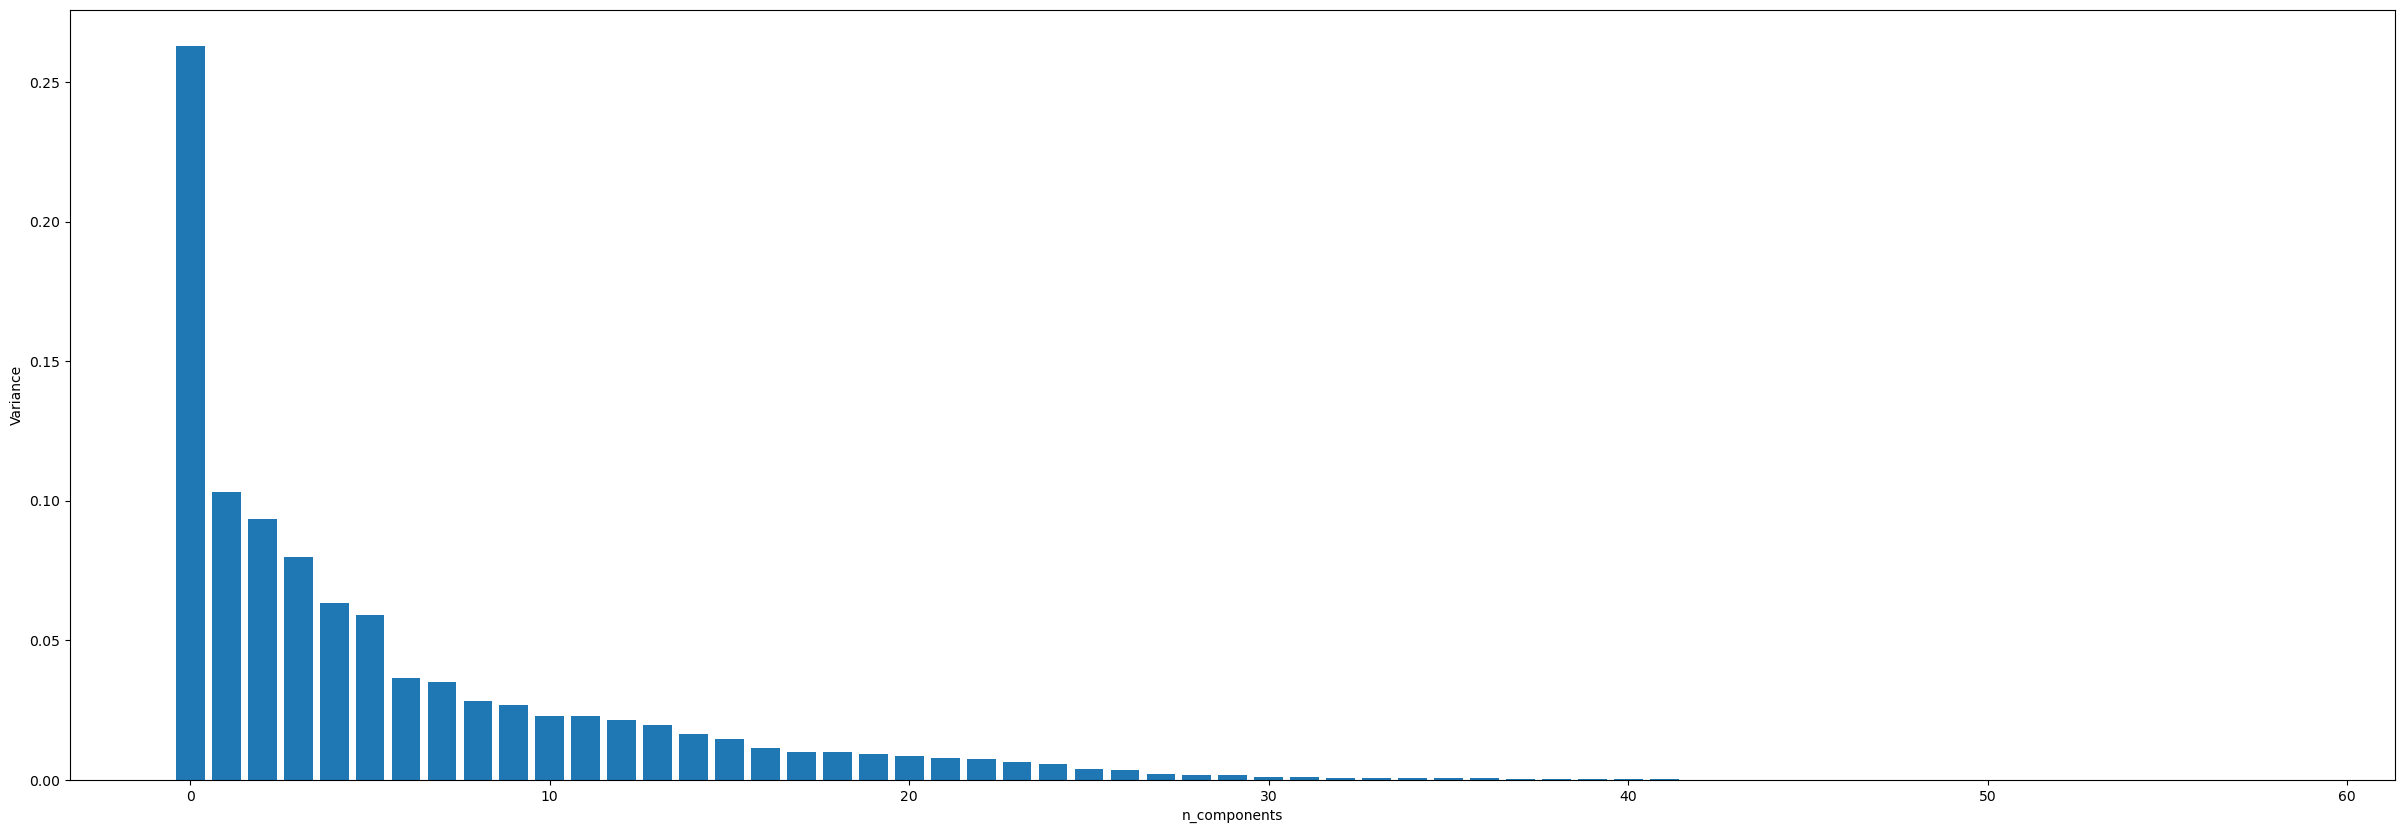

In [56]:
#Percentage of variance explained by each of the selected components.
#If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
var_per = sklearn_pca.explained_variance_ratio_
cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(30,10))
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')

In [57]:
len(cum_var_per[cum_var_per <= 0.95])

20

In [58]:
n_comp=len(cum_var_per[cum_var_per <= 0.95])
print("Keeping 90% Info with ",n_comp," components")
sklearn_pca = sklearnPCA(n_components=n_comp)
train_pca = sklearn_pca.fit_transform(X_std_train)
val_pca= sklearn_pca.transform(X_std_val)
test_pca = sklearn_pca.transform(X_std_test)

print("Shape before PCA for Train: ",X_std_train.shape)
print("Shape after PCA for Train: ",train_pca.shape)

print("Shape before PCA for Val: ",X_std_val.shape)
print("Shape after PCA for Val: ",val_pca.shape)

print("Shape before PCA for Test: ",X_std_test.shape)
print("Shape after PCA for Test: ",test_pca.shape)

Keeping 90% Info with  20  components
Shape before PCA for Train:  (49396, 59)
Shape after PCA for Train:  (49396, 20)
Shape before PCA for Val:  (16466, 59)
Shape after PCA for Val:  (16466, 20)
Shape before PCA for Test:  (16466, 59)
Shape after PCA for Test:  (16466, 20)


In [59]:
X_train= train_pca
X_val= val_pca
X_test= test_pca

## Model selection process and parameter tuning

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , recall_score, precision_score
from sklearn.metrics import roc_curve ,confusion_matrix , auc, roc_auc_score, classification_report , f1_score

In [61]:
def apply_algo(model, algoname):
    scoreslist=[]
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    y_predicted=model.predict(X_val)
    print(confusion_matrix(y_val, y_predicted))
    print(classification_report(y_val, y_predicted))

    fpr,tpr, th=roc_curve(y_val, y_predicted)
    print("roc_auc_score", roc_auc_score(y_val, y_predicted))
    print("accuracy", accuracy_score(y_val,y_predicted))
    print("recall ", recall_score(y_val,y_predicted))
    print( 'precision ',precision_score(y_val,y_predicted ))
    scoreslist.append( {'classiffier': algoname , 'accuracy':round(accuracy_score(y_val,y_predicted),3)
                , 'recall':round(recall_score(y_val,y_predicted),3)
                , 'precision': round(precision_score(y_val,y_predicted),3)
              , 'f1-score': round(f1_score(y_val,y_predicted),3)  , 'roc_auc_score': round(roc_auc_score(y_val, y_pred),3)})
    return scoreslist

def apply_algo__(model, algoname):
    scoreslist=[]
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    
    y_predicted=model.predict(X_val)
    print(confusion_matrix(y_val, y_predicted))
    print(classification_report(y_val, y_predicted))

    fpr,tpr, th=roc_curve(y_val, y_predicted)
   
    scoreslist.append( {'classiffier': algoname , 'accuracy':round(accuracy_score(y_val,y_predicted),3)
                , 'recall':round(recall_score(y_val,y_predicted),3)
                , 'precision': round(precision_score(y_val,y_predicted),3)
              , 'f1-score': round(f1_score(y_val,y_predicted), 3)  , 'roc_auc_score': round(roc_auc_score(y_val, y_pred),3)})
    return scoreslist

In [62]:
scores_dataframe= pd.DataFrame(columns=['classiffier' ,'accuracy' ,'recall' , 'precision' , 'f1-score' , 'roc_auc_score'])

# Logistic Regression

In [63]:
model=LogisticRegression(solver="liblinear", C=1.0, max_iter=3000 , random_state=1 )


In [64]:
results=apply_algo(model,'LogisticRegression' )
results

[[5628 1801]
 [1337 7700]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      7429
           1       0.81      0.85      0.83      9037

    accuracy                           0.81     16466
   macro avg       0.81      0.80      0.81     16466
weighted avg       0.81      0.81      0.81     16466

roc_auc_score 0.8048121754520121
accuracy 0.8094254828130694
recall  0.8520526723470179
precision  0.8104410062098727


[{'classiffier': 'LogisticRegression',
  'accuracy': 0.809,
  'recall': 0.852,
  'precision': 0.81,
  'f1-score': 0.831,
  'roc_auc_score': 0.9}]

#### Hypertuning for Logistic Regression 

We will tune the regularization parameter C.

In [65]:
for i in [0.001, 0.01, 0.1, 0.5, 1]:
    model=LogisticRegression(solver="liblinear", C=i, max_iter=3000 , random_state=1 )
    results=apply_algo__(model,'LogisticRegression' )
    print( f"c {i} : results",results )
    print("=============================================================================================")
    print()

 

[[5504 1925]
 [1500 7537]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      7429
           1       0.80      0.83      0.81      9037

    accuracy                           0.79     16466
   macro avg       0.79      0.79      0.79     16466
weighted avg       0.79      0.79      0.79     16466

c 0.001 : results [{'classiffier': 'LogisticRegression', 'accuracy': 0.792, 'recall': 0.834, 'precision': 0.797, 'f1-score': 0.815, 'roc_auc_score': 0.895}]

[[5613 1816]
 [1345 7692]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      7429
           1       0.81      0.85      0.83      9037

    accuracy                           0.81     16466
   macro avg       0.81      0.80      0.80     16466
weighted avg       0.81      0.81      0.81     16466

c 0.01 : results [{'classiffier': 'LogisticRegression', 'accuracy': 0.808, 'recall': 0.851, 'precision': 0.809, 'f1-score': 0.83, 'roc

when c =  0.1 is the best.

In [66]:
model=LogisticRegression(solver="liblinear", C= 0.1, max_iter=3000 , random_state=1 )
results=apply_algo(model,'LogisticRegression' )


[[5623 1806]
 [1329 7708]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      7429
           1       0.81      0.85      0.83      9037

    accuracy                           0.81     16466
   macro avg       0.81      0.80      0.81     16466
weighted avg       0.81      0.81      0.81     16466

roc_auc_score 0.8049182811698896
accuracy 0.8096076764241468
recall  0.852937921876729
precision  0.8101744797141055


In [67]:
scores_dataframe=scores_dataframe.append(results)
scores_dataframe

C:\Users\Asia\AppData\Local\Temp\ipykernel_11236\961713972.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_dataframe=scores_dataframe.append(results)


,classiffier,accuracy,recall,precision,f1-score,roc_auc_score
0,LogisticRegression,0.81,0.853,0.81,0.831,0.9


## DecisionTree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [69]:
dt = DecisionTreeClassifier(random_state=1)

In [70]:
scores_dataframe

,classiffier,accuracy,recall,precision,f1-score,roc_auc_score
0,LogisticRegression,0.81,0.853,0.81,0.831,0.9


In [71]:
results=apply_algo(dt,'DecisionTreeClassifier' )
results

[[6626  803]
 [ 757 8280]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7429
           1       0.91      0.92      0.91      9037

    accuracy                           0.91     16466
   macro avg       0.90      0.90      0.90     16466
weighted avg       0.91      0.91      0.91     16466

roc_auc_score 0.9040716726808632
accuracy 0.9052593222397668
recall  0.9162332632510789
precision  0.9115930859848068


[{'classiffier': 'DecisionTreeClassifier',
  'accuracy': 0.905,
  'recall': 0.916,
  'precision': 0.912,
  'f1-score': 0.914,
  'roc_auc_score': 0.904}]

#### Hypertuning for DecisionTree Classifier 

We will tune the below parameters:
- max_depth
- min_samples_leaf

In [72]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(random_state=1,max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.756
   2 -> 0.850
   3 -> 0.887
   4 -> 0.923
   5 -> 0.942
   6 -> 0.952
  10 -> 0.964
  15 -> 0.952
  20 -> 0.938
None -> 0.904


- Best max_depths are [6, 10 , 15]

In [73]:
scores = []

for depth in [6,10,15]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        y_predicted=(y_pred>=0.5)
        auc = roc_auc_score(y_val, y_pred)
        rcl= recall_score(y_val, y_predicted)
        scores.append((depth, s, auc , rcl))

In [74]:
columns = ['max_depth', 'min_samples_leaf', 'auc', 'recall']
df_dt_scores = pd.DataFrame(np.round(scores,3), columns=columns)
df_dt_scores.sort_values(by='auc', ascending=False)

,max_depth,min_samples_leaf,auc,recall
20,15.0,20.0,0.969,0.884
19,15.0,15.0,0.969,0.880
11,10.0,15.0,0.968,0.871
12,10.0,20.0,0.967,0.871
9,10.0,5.0,0.967,0.872
10,10.0,10.0,0.967,0.874
22,15.0,100.0,0.966,0.867
18,15.0,10.0,0.965,0.887
14,10.0,100.0,0.965,0.863
23,15.0,200.0,0.963,0.868


best max_depth =15 and best min_samples_leaf =20


In [75]:
dt = DecisionTreeClassifier( max_depth= 15, min_samples_leaf=20, random_state=1)

In [76]:
results=apply_algo(dt,'DecisionTreeClassifier' )
results


[[6935  494]
 [1089 7948]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      7429
           1       0.94      0.88      0.91      9037

    accuracy                           0.90     16466
   macro avg       0.90      0.91      0.90     16466
weighted avg       0.91      0.90      0.90     16466

roc_auc_score 0.9064996220426
accuracy 0.9038625045548403
recall  0.8794954077680647
precision  0.9414830608860459


[{'classiffier': 'DecisionTreeClassifier',
  'accuracy': 0.904,
  'recall': 0.879,
  'precision': 0.941,
  'f1-score': 0.909,
  'roc_auc_score': 0.968}]

In [77]:
scores_dataframe=scores_dataframe.append(results)


C:\Users\Asia\AppData\Local\Temp\ipykernel_11236\4099938778.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_dataframe=scores_dataframe.append(results)


In [78]:
scores_dataframe

,classiffier,accuracy,recall,precision,f1-score,roc_auc_score
0,LogisticRegression,0.810,0.853,0.810,0.831,0.900
0,DecisionTreeClassifier,0.904,0.879,0.941,0.909,0.968


## RandomForestClassifier

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( random_state=1)
results=apply_algo(rf,'RandomForestClassifier' )
results

[[7037  392]
 [ 793 8244]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      7429
           1       0.95      0.91      0.93      9037

    accuracy                           0.93     16466
   macro avg       0.93      0.93      0.93     16466
weighted avg       0.93      0.93      0.93     16466

roc_auc_score 0.9297417269006094
accuracy 0.9280335236244383
recall  0.9122496403673785
precision  0.9546086150995832


[{'classiffier': 'RandomForestClassifier',
  'accuracy': 0.928,
  'recall': 0.912,
  'precision': 0.955,
  'f1-score': 0.933,
  'roc_auc_score': 0.984}]

#### Hyperparameter Tuning

We will tune the below parameters:
- n_estimators
- max_depth
- min_samples_leaf

In [80]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [81]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [82]:
df_scores.sort_values(by= 'auc', ascending=False )

,n_estimators,auc
19,200,0.984807
18,190,0.984783
16,170,0.984689
17,180,0.984689
14,150,0.984679
13,140,0.984653
15,160,0.984648
12,130,0.984598
11,120,0.984524
10,110,0.984483


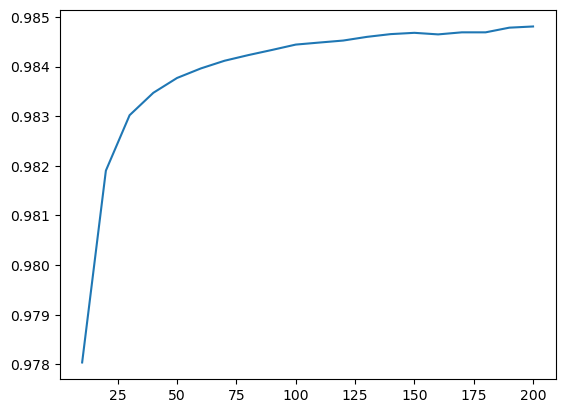

In [83]:
plt.plot(df_scores.n_estimators, df_scores.auc)

Best n_estimators is 200. Let's tune max_depth with n_estimators.

In [84]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [85]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.sort_values(by= 'auc', ascending=False )


,max_depth,n_estimators,auc
50,15,110,0.983028
52,15,130,0.983004
49,15,100,0.983000
53,15,140,0.982990
54,15,150,0.982975
51,15,120,0.982974
48,15,90,0.982912
56,15,170,0.982910
55,15,160,0.982910
58,15,190,0.982904


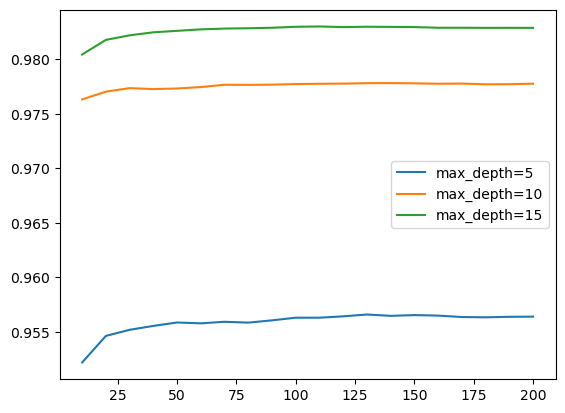

In [86]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [87]:
max_depth = 15  ## The best

In [88]:
scores = []

for s in [2, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [89]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)


In [90]:
df_scores.sort_values(by= 'auc', ascending=False ).head(50)


,min_samples_leaf,n_estimators,auc
18,2,190,0.982814
19,2,200,0.982795
15,2,160,0.982792
17,2,180,0.982790
16,2,170,0.982787
13,2,140,0.982771
12,2,130,0.982768
14,2,150,0.982767
11,2,120,0.982758
10,2,110,0.982718


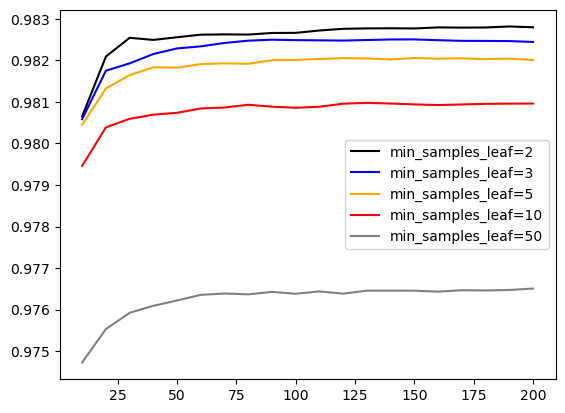

In [91]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [2, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [92]:
min_samples_leaf= 2 ## 2 is the best as per the grapgh

In [93]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)

In [94]:
results=apply_algo(rf,'RandomForestClassifier' )
results


[[7121  308]
 [ 944 8093]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      7429
           1       0.96      0.90      0.93      9037

    accuracy                           0.92     16466
   macro avg       0.92      0.93      0.92     16466
weighted avg       0.93      0.92      0.92     16466

roc_auc_score 0.9270407044531914
accuracy 0.9239645329770436
recall  0.8955405554940798
precision  0.963337697893108


[{'classiffier': 'RandomForestClassifier',
  'accuracy': 0.924,
  'recall': 0.896,
  'precision': 0.963,
  'f1-score': 0.928,
  'roc_auc_score': 0.983}]

In [95]:
scores_dataframe=scores_dataframe.append(results)


C:\Users\Asia\AppData\Local\Temp\ipykernel_11236\4099938778.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_dataframe=scores_dataframe.append(results)


In [96]:
scores_dataframe

,classiffier,accuracy,recall,precision,f1-score,roc_auc_score
0,LogisticRegression,0.810,0.853,0.810,0.831,0.900
0,DecisionTreeClassifier,0.904,0.879,0.941,0.909,0.968
0,RandomForestClassifier,0.924,0.896,0.963,0.928,0.983


In [97]:
import xgboost as xgb

In [98]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [99]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [100]:
y_pred = model.predict(dval)

In [101]:
roc_auc_score(y_val, y_pred)

0.9727900685822614

In [102]:
watchlist = [(dtrain, 'train'), (dval, 'val')]


In [103]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [104]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [105]:
df_score = parse_xgb_output(output)
df_score

,num_iter,train_auc,val_auc
0,0,0.95537,0.95237
1,5,0.97138,0.96762
2,10,0.97571,0.97292
3,15,0.97780,0.97492
4,20,0.97986,0.97639
5,25,0.98308,0.97831
6,30,0.98525,0.97917
7,35,0.98660,0.97961
8,40,0.98796,0.98001
9,45,0.98979,0.98086


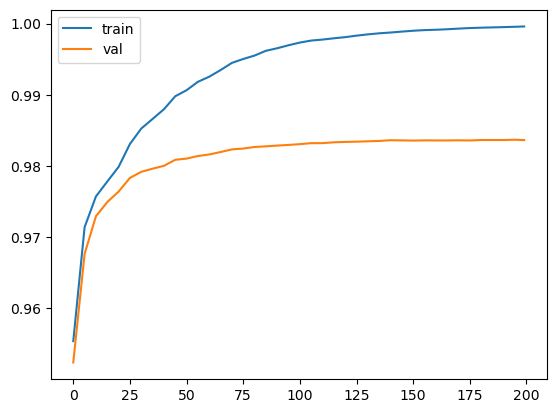

In [106]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

#### Hyperparameter Tuning

We will tune the below parameters:
- eta
- max_depth


In [107]:
scores = {}

[0]	train-auc:0.92438	val-auc:0.92254
[5]	train-auc:0.92615	val-auc:0.92384
[10]	train-auc:0.92883	val-auc:0.92663
[15]	train-auc:0.92980	val-auc:0.92764
[20]	train-auc:0.93436	val-auc:0.93231
[25]	train-auc:0.93533	val-auc:0.93334
[30]	train-auc:0.94471	val-auc:0.94199
[35]	train-auc:0.94700	val-auc:0.94428
[40]	train-auc:0.94906	val-auc:0.94618
[45]	train-auc:0.95002	val-auc:0.94712
[50]	train-auc:0.95132	val-auc:0.94836
[55]	train-auc:0.95196	val-auc:0.94883
[60]	train-auc:0.95281	val-auc:0.94968
[65]	train-auc:0.95352	val-auc:0.95039
[70]	train-auc:0.95415	val-auc:0.95095
[75]	train-auc:0.95452	val-auc:0.95122
[80]	train-auc:0.95503	val-auc:0.95170
[85]	train-auc:0.95563	val-auc:0.95238
[90]	train-auc:0.95609	val-auc:0.95293
[95]	train-auc:0.95693	val-auc:0.95374
[100]	train-auc:0.95732	val-auc:0.95402
[105]	train-auc:0.95769	val-auc:0.95434
[110]	train-auc:0.95833	val-auc:0.95536
[115]	train-auc:0.95863	val-auc:0.95569
[120]	train-auc:0.95884	val-auc:0.95596
[125]	train-auc:0.9590

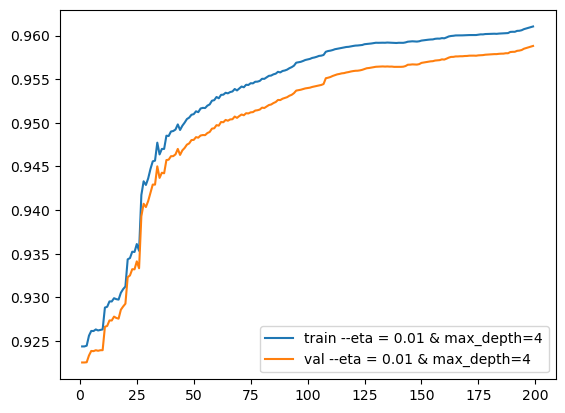

[0]	train-auc:0.95537	val-auc:0.95237
[5]	train-auc:0.95631	val-auc:0.95287
[10]	train-auc:0.95754	val-auc:0.95407
[15]	train-auc:0.95771	val-auc:0.95428
[20]	train-auc:0.95802	val-auc:0.95450
[25]	train-auc:0.95883	val-auc:0.95503
[30]	train-auc:0.96140	val-auc:0.95749
[35]	train-auc:0.96164	val-auc:0.95776
[40]	train-auc:0.96348	val-auc:0.95992
[45]	train-auc:0.96418	val-auc:0.96066
[50]	train-auc:0.96464	val-auc:0.96104
[55]	train-auc:0.96561	val-auc:0.96202
[60]	train-auc:0.96604	val-auc:0.96248
[65]	train-auc:0.96646	val-auc:0.96297
[70]	train-auc:0.96692	val-auc:0.96348
[75]	train-auc:0.96732	val-auc:0.96377
[80]	train-auc:0.96765	val-auc:0.96400
[85]	train-auc:0.96791	val-auc:0.96423
[90]	train-auc:0.96815	val-auc:0.96430
[95]	train-auc:0.96828	val-auc:0.96438
[100]	train-auc:0.96849	val-auc:0.96456
[105]	train-auc:0.96874	val-auc:0.96472
[110]	train-auc:0.96906	val-auc:0.96500
[115]	train-auc:0.96970	val-auc:0.96572
[120]	train-auc:0.97008	val-auc:0.96629
[125]	train-auc:0.9703

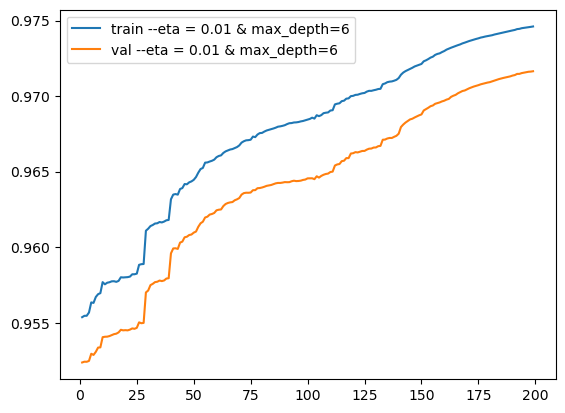

[0]	train-auc:0.96972	val-auc:0.96390
[5]	train-auc:0.96989	val-auc:0.96433
[10]	train-auc:0.97164	val-auc:0.96689
[15]	train-auc:0.97205	val-auc:0.96733
[20]	train-auc:0.97231	val-auc:0.96761
[25]	train-auc:0.97256	val-auc:0.96780
[30]	train-auc:0.97288	val-auc:0.96808
[35]	train-auc:0.97334	val-auc:0.96841
[40]	train-auc:0.97355	val-auc:0.96867
[45]	train-auc:0.97445	val-auc:0.96960
[50]	train-auc:0.97462	val-auc:0.96969
[55]	train-auc:0.97484	val-auc:0.96991
[60]	train-auc:0.97511	val-auc:0.97028
[65]	train-auc:0.97524	val-auc:0.97035
[70]	train-auc:0.97543	val-auc:0.97048
[75]	train-auc:0.97559	val-auc:0.97058
[80]	train-auc:0.97564	val-auc:0.97064
[85]	train-auc:0.97583	val-auc:0.97093
[90]	train-auc:0.97599	val-auc:0.97106
[95]	train-auc:0.97617	val-auc:0.97123
[100]	train-auc:0.97637	val-auc:0.97138
[105]	train-auc:0.97650	val-auc:0.97153
[110]	train-auc:0.97662	val-auc:0.97159
[115]	train-auc:0.97684	val-auc:0.97177
[120]	train-auc:0.97696	val-auc:0.97188
[125]	train-auc:0.9771

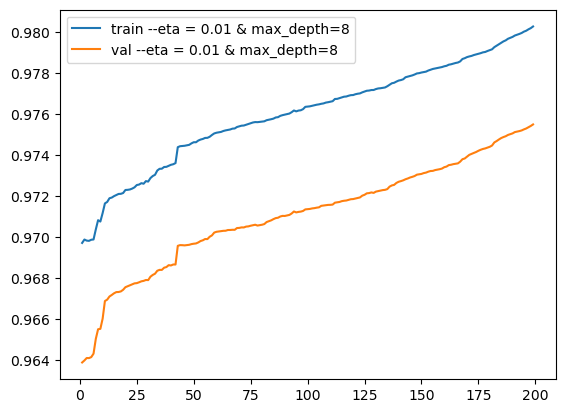

[0]	train-auc:0.92438	val-auc:0.92254
[5]	train-auc:0.94536	val-auc:0.94254
[10]	train-auc:0.95179	val-auc:0.94902
[15]	train-auc:0.95503	val-auc:0.95174
[20]	train-auc:0.95745	val-auc:0.95405
[25]	train-auc:0.95948	val-auc:0.95655
[30]	train-auc:0.96012	val-auc:0.95752
[35]	train-auc:0.96051	val-auc:0.95810
[40]	train-auc:0.96154	val-auc:0.95911
[45]	train-auc:0.96267	val-auc:0.96030
[50]	train-auc:0.96333	val-auc:0.96122
[55]	train-auc:0.96394	val-auc:0.96191
[60]	train-auc:0.96422	val-auc:0.96212
[65]	train-auc:0.96485	val-auc:0.96281
[70]	train-auc:0.96522	val-auc:0.96329
[75]	train-auc:0.96587	val-auc:0.96393
[80]	train-auc:0.96666	val-auc:0.96474
[85]	train-auc:0.96742	val-auc:0.96546
[90]	train-auc:0.96797	val-auc:0.96600
[95]	train-auc:0.96837	val-auc:0.96640
[100]	train-auc:0.96894	val-auc:0.96685
[105]	train-auc:0.96937	val-auc:0.96731
[110]	train-auc:0.97005	val-auc:0.96793
[115]	train-auc:0.97050	val-auc:0.96830
[120]	train-auc:0.97094	val-auc:0.96868
[125]	train-auc:0.9713

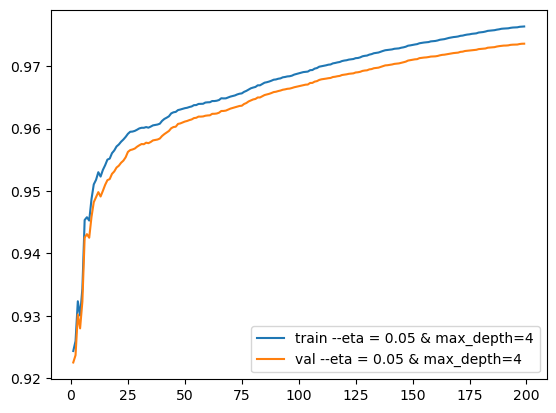

[0]	train-auc:0.95537	val-auc:0.95237
[5]	train-auc:0.95895	val-auc:0.95504
[10]	train-auc:0.96535	val-auc:0.96173
[15]	train-auc:0.96758	val-auc:0.96386
[20]	train-auc:0.96861	val-auc:0.96460
[25]	train-auc:0.97020	val-auc:0.96632
[30]	train-auc:0.97258	val-auc:0.96927
[35]	train-auc:0.97380	val-auc:0.97087
[40]	train-auc:0.97475	val-auc:0.97177
[45]	train-auc:0.97554	val-auc:0.97258
[50]	train-auc:0.97630	val-auc:0.97336
[55]	train-auc:0.97682	val-auc:0.97388
[60]	train-auc:0.97706	val-auc:0.97415
[65]	train-auc:0.97726	val-auc:0.97430
[70]	train-auc:0.97740	val-auc:0.97444
[75]	train-auc:0.97768	val-auc:0.97468
[80]	train-auc:0.97788	val-auc:0.97490
[85]	train-auc:0.97803	val-auc:0.97502
[90]	train-auc:0.97816	val-auc:0.97509
[95]	train-auc:0.97843	val-auc:0.97529
[100]	train-auc:0.97860	val-auc:0.97541
[105]	train-auc:0.97904	val-auc:0.97575
[110]	train-auc:0.97976	val-auc:0.97627
[115]	train-auc:0.98025	val-auc:0.97664
[120]	train-auc:0.98088	val-auc:0.97706
[125]	train-auc:0.9814

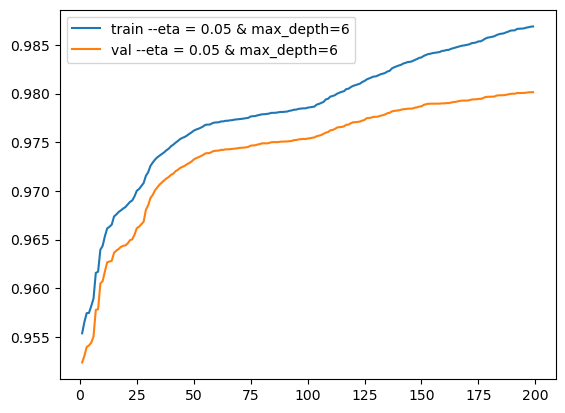

[0]	train-auc:0.96972	val-auc:0.96390
[5]	train-auc:0.97272	val-auc:0.96800
[10]	train-auc:0.97471	val-auc:0.96981
[15]	train-auc:0.97553	val-auc:0.97057
[20]	train-auc:0.97630	val-auc:0.97137
[25]	train-auc:0.97706	val-auc:0.97195
[30]	train-auc:0.97806	val-auc:0.97311
[35]	train-auc:0.97901	val-auc:0.97440
[40]	train-auc:0.98049	val-auc:0.97581
[45]	train-auc:0.98179	val-auc:0.97695
[50]	train-auc:0.98273	val-auc:0.97774
[55]	train-auc:0.98349	val-auc:0.97831
[60]	train-auc:0.98407	val-auc:0.97882
[65]	train-auc:0.98460	val-auc:0.97914
[70]	train-auc:0.98484	val-auc:0.97938
[75]	train-auc:0.98497	val-auc:0.97950
[80]	train-auc:0.98521	val-auc:0.97963
[85]	train-auc:0.98539	val-auc:0.97965
[90]	train-auc:0.98557	val-auc:0.97969
[95]	train-auc:0.98573	val-auc:0.97980
[100]	train-auc:0.98600	val-auc:0.97997
[105]	train-auc:0.98622	val-auc:0.98009
[110]	train-auc:0.98650	val-auc:0.98019
[115]	train-auc:0.98686	val-auc:0.98039
[120]	train-auc:0.98731	val-auc:0.98059
[125]	train-auc:0.9875

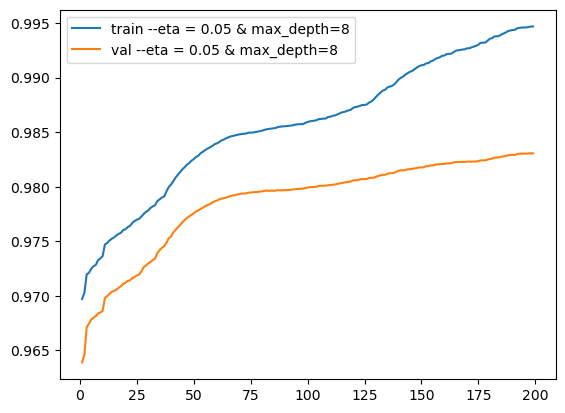

[0]	train-auc:0.92438	val-auc:0.92254
[5]	train-auc:0.95223	val-auc:0.94897
[10]	train-auc:0.95689	val-auc:0.95363
[15]	train-auc:0.95949	val-auc:0.95677
[20]	train-auc:0.96215	val-auc:0.95968
[25]	train-auc:0.96337	val-auc:0.96111
[30]	train-auc:0.96466	val-auc:0.96241
[35]	train-auc:0.96572	val-auc:0.96366
[40]	train-auc:0.96652	val-auc:0.96450
[45]	train-auc:0.96837	val-auc:0.96628
[50]	train-auc:0.96976	val-auc:0.96764
[55]	train-auc:0.97131	val-auc:0.96909
[60]	train-auc:0.97209	val-auc:0.96977
[65]	train-auc:0.97272	val-auc:0.97021
[70]	train-auc:0.97379	val-auc:0.97120
[75]	train-auc:0.97442	val-auc:0.97184
[80]	train-auc:0.97501	val-auc:0.97243
[85]	train-auc:0.97577	val-auc:0.97302
[90]	train-auc:0.97617	val-auc:0.97337
[95]	train-auc:0.97657	val-auc:0.97363
[100]	train-auc:0.97702	val-auc:0.97405
[105]	train-auc:0.97748	val-auc:0.97437
[110]	train-auc:0.97792	val-auc:0.97479
[115]	train-auc:0.97825	val-auc:0.97509
[120]	train-auc:0.97841	val-auc:0.97519
[125]	train-auc:0.9788

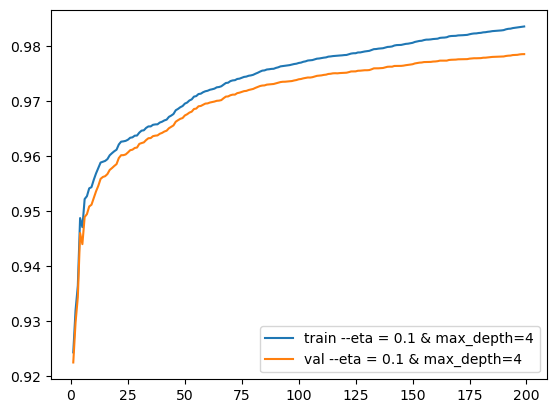

[0]	train-auc:0.95537	val-auc:0.95237
[5]	train-auc:0.96496	val-auc:0.96159
[10]	train-auc:0.96814	val-auc:0.96439
[15]	train-auc:0.97271	val-auc:0.96952
[20]	train-auc:0.97491	val-auc:0.97181
[25]	train-auc:0.97602	val-auc:0.97304
[30]	train-auc:0.97710	val-auc:0.97425
[35]	train-auc:0.97761	val-auc:0.97475
[40]	train-auc:0.97813	val-auc:0.97524
[45]	train-auc:0.97858	val-auc:0.97546
[50]	train-auc:0.97933	val-auc:0.97602
[55]	train-auc:0.98001	val-auc:0.97648
[60]	train-auc:0.98091	val-auc:0.97716
[65]	train-auc:0.98167	val-auc:0.97758
[70]	train-auc:0.98254	val-auc:0.97805
[75]	train-auc:0.98333	val-auc:0.97857
[80]	train-auc:0.98464	val-auc:0.97937
[85]	train-auc:0.98501	val-auc:0.97950
[90]	train-auc:0.98580	val-auc:0.97983
[95]	train-auc:0.98629	val-auc:0.98001
[100]	train-auc:0.98693	val-auc:0.98024
[105]	train-auc:0.98744	val-auc:0.98051
[110]	train-auc:0.98791	val-auc:0.98063
[115]	train-auc:0.98824	val-auc:0.98075
[120]	train-auc:0.98897	val-auc:0.98102
[125]	train-auc:0.9895

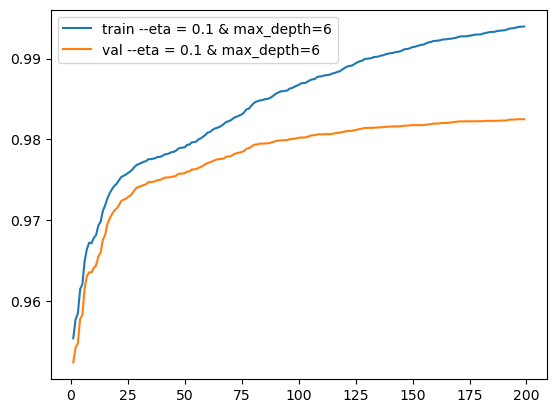

[0]	train-auc:0.96972	val-auc:0.96390
[5]	train-auc:0.97468	val-auc:0.96976
[10]	train-auc:0.97639	val-auc:0.97142
[15]	train-auc:0.97799	val-auc:0.97329
[20]	train-auc:0.98088	val-auc:0.97623
[25]	train-auc:0.98284	val-auc:0.97782
[30]	train-auc:0.98401	val-auc:0.97877
[35]	train-auc:0.98460	val-auc:0.97901
[40]	train-auc:0.98521	val-auc:0.97935
[45]	train-auc:0.98552	val-auc:0.97957
[50]	train-auc:0.98583	val-auc:0.97976
[55]	train-auc:0.98639	val-auc:0.98003
[60]	train-auc:0.98722	val-auc:0.98039
[65]	train-auc:0.98863	val-auc:0.98083
[70]	train-auc:0.98966	val-auc:0.98112
[75]	train-auc:0.99029	val-auc:0.98130
[80]	train-auc:0.99174	val-auc:0.98179
[85]	train-auc:0.99266	val-auc:0.98206
[90]	train-auc:0.99333	val-auc:0.98232
[95]	train-auc:0.99372	val-auc:0.98237
[100]	train-auc:0.99412	val-auc:0.98253
[105]	train-auc:0.99453	val-auc:0.98259
[110]	train-auc:0.99506	val-auc:0.98280
[115]	train-auc:0.99545	val-auc:0.98276
[120]	train-auc:0.99590	val-auc:0.98285
[125]	train-auc:0.9961

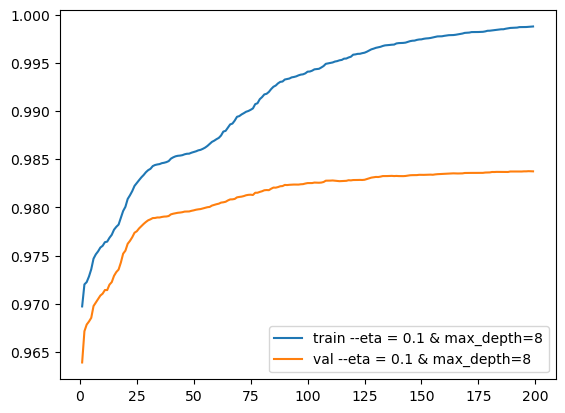

[0]	train-auc:0.92438	val-auc:0.92254
[5]	train-auc:0.96808	val-auc:0.96547
[10]	train-auc:0.97519	val-auc:0.97169
[15]	train-auc:0.97867	val-auc:0.97417
[20]	train-auc:0.98113	val-auc:0.97555
[25]	train-auc:0.98335	val-auc:0.97703
[30]	train-auc:0.98477	val-auc:0.97716
[35]	train-auc:0.98607	val-auc:0.97749
[40]	train-auc:0.98727	val-auc:0.97795
[45]	train-auc:0.98834	val-auc:0.97830
[50]	train-auc:0.98927	val-auc:0.97868
[55]	train-auc:0.99015	val-auc:0.97891
[60]	train-auc:0.99102	val-auc:0.97904
[65]	train-auc:0.99174	val-auc:0.97927
[70]	train-auc:0.99255	val-auc:0.97907
[75]	train-auc:0.99316	val-auc:0.97929
[80]	train-auc:0.99376	val-auc:0.97919
[85]	train-auc:0.99426	val-auc:0.97935
[90]	train-auc:0.99467	val-auc:0.97948
[95]	train-auc:0.99506	val-auc:0.97956
[100]	train-auc:0.99551	val-auc:0.98000
[105]	train-auc:0.99583	val-auc:0.97995
[110]	train-auc:0.99615	val-auc:0.97982
[115]	train-auc:0.99642	val-auc:0.97960
[120]	train-auc:0.99667	val-auc:0.97959
[125]	train-auc:0.9969

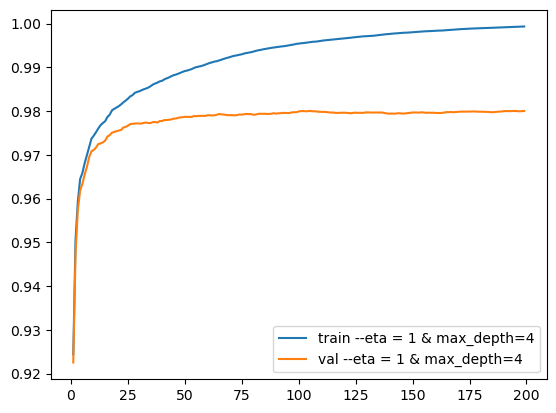

[0]	train-auc:0.95537	val-auc:0.95237
[5]	train-auc:0.97837	val-auc:0.97335
[10]	train-auc:0.98469	val-auc:0.97755
[15]	train-auc:0.98978	val-auc:0.97953
[20]	train-auc:0.99268	val-auc:0.98038
[25]	train-auc:0.99476	val-auc:0.97985
[30]	train-auc:0.99590	val-auc:0.98004
[35]	train-auc:0.99703	val-auc:0.97989
[40]	train-auc:0.99771	val-auc:0.98005
[45]	train-auc:0.99833	val-auc:0.98019
[50]	train-auc:0.99882	val-auc:0.98041
[55]	train-auc:0.99914	val-auc:0.98062
[60]	train-auc:0.99938	val-auc:0.98047
[65]	train-auc:0.99952	val-auc:0.98057
[70]	train-auc:0.99969	val-auc:0.98073
[75]	train-auc:0.99979	val-auc:0.98083
[80]	train-auc:0.99988	val-auc:0.98090
[85]	train-auc:0.99993	val-auc:0.98084
[90]	train-auc:0.99996	val-auc:0.98083
[95]	train-auc:0.99997	val-auc:0.98083
[100]	train-auc:0.99999	val-auc:0.98094
[105]	train-auc:0.99999	val-auc:0.98103
[110]	train-auc:1.00000	val-auc:0.98124
[115]	train-auc:1.00000	val-auc:0.98133
[120]	train-auc:1.00000	val-auc:0.98157
[125]	train-auc:1.0000

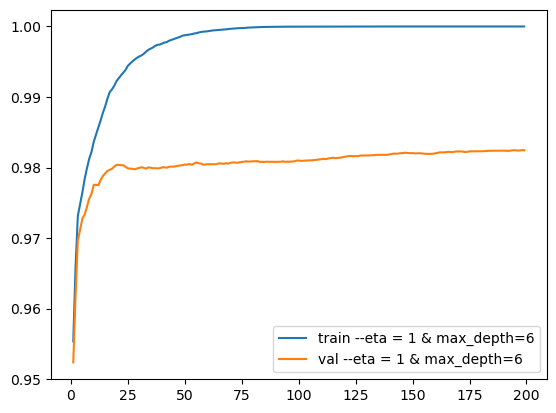

[0]	train-auc:0.96972	val-auc:0.96390
[5]	train-auc:0.98805	val-auc:0.97789
[10]	train-auc:0.99344	val-auc:0.97911
[15]	train-auc:0.99693	val-auc:0.97965
[20]	train-auc:0.99856	val-auc:0.97940
[25]	train-auc:0.99919	val-auc:0.97946
[30]	train-auc:0.99970	val-auc:0.98008
[35]	train-auc:0.99988	val-auc:0.97993
[40]	train-auc:0.99995	val-auc:0.98011
[45]	train-auc:0.99999	val-auc:0.98006
[50]	train-auc:1.00000	val-auc:0.98036
[55]	train-auc:1.00000	val-auc:0.98039
[60]	train-auc:1.00000	val-auc:0.98071
[65]	train-auc:1.00000	val-auc:0.98096
[70]	train-auc:1.00000	val-auc:0.98110
[75]	train-auc:1.00000	val-auc:0.98125
[80]	train-auc:1.00000	val-auc:0.98128
[85]	train-auc:1.00000	val-auc:0.98140
[90]	train-auc:1.00000	val-auc:0.98146
[95]	train-auc:1.00000	val-auc:0.98145
[100]	train-auc:1.00000	val-auc:0.98137
[105]	train-auc:1.00000	val-auc:0.98160
[110]	train-auc:1.00000	val-auc:0.98172
[115]	train-auc:1.00000	val-auc:0.98183
[120]	train-auc:1.00000	val-auc:0.98179
[125]	train-auc:1.0000

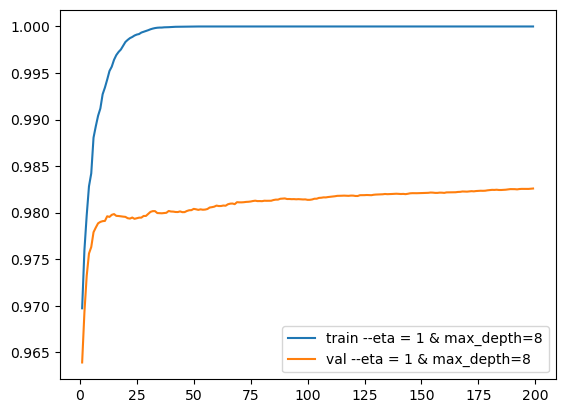

In [108]:
columns = ['iter', 'train_auc', 'val_auc']

for i in [0.01,0.05, 0.1,1]:
    for k in [4,6,8]:
        evals_result = {}
        xgb_params = {
            'eta': i, 
            'max_depth': k,
            'min_child_weight': 1,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }
        model = xgb.train(params=xgb_params,
                  dtrain=dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist,
                  evals_result=evals_result)


        train_aucs = list(evals_result['train'].values())[0]
        val_aucs = list(evals_result['val'].values())[0]

        df_scores = pd.DataFrame(
            list(zip(
                range(1, len(train_aucs)),
                train_aucs,
                val_aucs
            )), columns=columns)

        plt.plot(df_scores.iter, df_scores.train_auc, label=f'train --eta = {i} & max_depth={k}')
        plt.plot(df_scores.iter, df_scores.val_auc, label=f'val --eta = {i} & max_depth={k}')
       # plt.ylim ([0.97, 1])
        plt.legend()
        plt.show()

In [109]:
eta=0.1
max_depth=8

In [110]:
s = output.stdout
s

'[0]\ttrain-auc:0.95537\tval-auc:0.95237\n[5]\ttrain-auc:0.97138\tval-auc:0.96762\n[10]\ttrain-auc:0.97571\tval-auc:0.97292\n[15]\ttrain-auc:0.97780\tval-auc:0.97492\n[20]\ttrain-auc:0.97986\tval-auc:0.97639\n[25]\ttrain-auc:0.98308\tval-auc:0.97831\n[30]\ttrain-auc:0.98525\tval-auc:0.97917\n[35]\ttrain-auc:0.98660\tval-auc:0.97961\n[40]\ttrain-auc:0.98796\tval-auc:0.98001\n[45]\ttrain-auc:0.98979\tval-auc:0.98086\n[50]\ttrain-auc:0.99064\tval-auc:0.98103\n[55]\ttrain-auc:0.99182\tval-auc:0.98139\n[60]\ttrain-auc:0.99254\tval-auc:0.98161\n[65]\ttrain-auc:0.99347\tval-auc:0.98195\n[70]\ttrain-auc:0.99448\tval-auc:0.98232\n[75]\ttrain-auc:0.99503\tval-auc:0.98244\n[80]\ttrain-auc:0.99551\tval-auc:0.98266\n[85]\ttrain-auc:0.99618\tval-auc:0.98275\n[90]\ttrain-auc:0.99654\tval-auc:0.98286\n[95]\ttrain-auc:0.99696\tval-auc:0.98295\n[100]\ttrain-auc:0.99734\tval-auc:0.98306\n[105]\ttrain-auc:0.99762\tval-auc:0.98320\n[110]\ttrain-auc:0.99776\tval-auc:0.98320\n[115]\ttrain-auc:0.99794\tval-au

In [111]:
xgb_params = {
    'eta': eta, 
    'max_depth': max_depth,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-auc:0.96972	val-auc:0.96390
[5]	train-auc:0.97468	val-auc:0.96976
[10]	train-auc:0.97639	val-auc:0.97142
[15]	train-auc:0.97799	val-auc:0.97329
[20]	train-auc:0.98088	val-auc:0.97623
[25]	train-auc:0.98284	val-auc:0.97782
[30]	train-auc:0.98401	val-auc:0.97877
[35]	train-auc:0.98460	val-auc:0.97901
[40]	train-auc:0.98521	val-auc:0.97935
[45]	train-auc:0.98552	val-auc:0.97957
[50]	train-auc:0.98583	val-auc:0.97976
[55]	train-auc:0.98639	val-auc:0.98003
[60]	train-auc:0.98722	val-auc:0.98039
[65]	train-auc:0.98863	val-auc:0.98083
[70]	train-auc:0.98966	val-auc:0.98112
[75]	train-auc:0.99029	val-auc:0.98130
[80]	train-auc:0.99174	val-auc:0.98179
[85]	train-auc:0.99266	val-auc:0.98206
[90]	train-auc:0.99333	val-auc:0.98232
[95]	train-auc:0.99372	val-auc:0.98237
[100]	train-auc:0.99412	val-auc:0.98253
[105]	train-auc:0.99453	val-auc:0.98259
[110]	train-auc:0.99506	val-auc:0.98280
[115]	train-auc:0.99545	val-auc:0.98276
[120]	train-auc:0.99590	val-auc:0.98285
[125]	train-auc:0.9961

In [112]:
#y_pred = model.predict_proba(X_val)[:, 1] 
y_pred=model.predict(dval)
y_predicted= (y_pred>=0.5).astype(int)
print(confusion_matrix(y_val, y_predicted))
print(classification_report(y_val, y_predicted))

fpr,tpr, th=roc_curve(y_val, y_predicted)
   
scores_dataframe=scores_dataframe.append( {'classiffier': "XGboost" , 'accuracy':round(accuracy_score(y_val,y_predicted),3)
                , 'recall':round(recall_score(y_val,y_predicted),3)
                , 'precision': round(precision_score(y_val,y_predicted),3)
              , 'f1-score': round(f1_score(y_val,y_predicted), 3)  , 'roc_auc_score': round(roc_auc_score(y_val, y_pred),3)} , ignore_index=True)

scores_dataframe 

[[7018  411]
 [ 800 8237]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7429
           1       0.95      0.91      0.93      9037

    accuracy                           0.93     16466
   macro avg       0.93      0.93      0.93     16466
weighted avg       0.93      0.93      0.93     16466



C:\Users\Asia\AppData\Local\Temp\ipykernel_11236\1370493779.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_dataframe=scores_dataframe.append( {'classiffier': "XGboost" , 'accuracy':round(accuracy_score(y_val,y_predicted),3)


,classiffier,accuracy,recall,precision,f1-score,roc_auc_score
0,LogisticRegression,0.810,0.853,0.810,0.831,0.900
1,DecisionTreeClassifier,0.904,0.879,0.941,0.909,0.968
2,RandomForestClassifier,0.924,0.896,0.963,0.928,0.983
3,XGboost,0.926,0.911,0.952,0.932,0.984


In [113]:
df_scores

,iter,train_auc,val_auc
0,1,0.969720,0.963898
1,2,0.975970,0.969280
2,3,0.979702,0.973193
3,4,0.982825,0.975606
4,5,0.984218,0.976302
...,...,...,...
194,195,1.000000,0.982547
195,196,1.000000,0.982547
196,197,1.000000,0.982547
197,198,1.000000,0.982566


#### RandomForestClassifier and XGboost Classifier are the best classifier so far. Let'combine the training data with Val data & test the model on unseen data

In [114]:
X_full_train= np.concatenate(( X_train, X_val) , axis=0)
y_full_train=np.concatenate(( y_train, y_val) , axis=0)

In [115]:
len(X_full_train) , len(y_full_train)

(65862, 65862)

In [116]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=15,
                            min_samples_leaf=2,
                            random_state=1)


In [117]:
scores={}
rf.fit(X_full_train, y_full_train) 
y_pred = rf.predict_proba(X_test)[:, 1] 
y_predicted=rf.predict(X_test) 
print(confusion_matrix(y_test, y_predicted)) 
print(classification_report(y_test, y_predicted)) 
fpr,tpr, th=roc_curve(y_test, y_predicted)
   
scores= {'classiffier': 'RandomForestClassifier' , 'accuracy':round(accuracy_score(y_test,y_predicted),3)
                , 'recall':round(recall_score(y_test,y_predicted),3)
                , 'precision': round(precision_score(y_test,y_predicted),3), 'f1-score': round(f1_score(y_test,y_predicted), 3)  , 
         'roc_auc_score': round(roc_auc_score(y_test, y_pred),3)}

scores


 

[[7049  267]
 [ 963 8187]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      7316
           1       0.97      0.89      0.93      9150

    accuracy                           0.93     16466
   macro avg       0.92      0.93      0.92     16466
weighted avg       0.93      0.93      0.93     16466



{'classiffier': 'RandomForestClassifier',
 'accuracy': 0.925,
 'recall': 0.895,
 'precision': 0.968,
 'f1-score': 0.93,
 'roc_auc_score': 0.984}

### Final XGboosting Model Testing

In [118]:
eta=0.1
max_depth=8

dtrain = xgb.DMatrix(X_full_train, label=y_full_train)

dtest = xgb.DMatrix(X_test, label=y_test)

In [119]:
watchlist = [(dtrain, 'train'), (dval, 'val')]


In [120]:
xgb_params = {
    'eta': eta, 
    'max_depth': max_depth,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}



model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-auc:0.96942	val-auc:0.96886
[5]	train-auc:0.97481	val-auc:0.97440
[10]	train-auc:0.97661	val-auc:0.97643
[15]	train-auc:0.97816	val-auc:0.97825
[20]	train-auc:0.98060	val-auc:0.98068
[25]	train-auc:0.98200	val-auc:0.98215
[30]	train-auc:0.98267	val-auc:0.98289
[35]	train-auc:0.98353	val-auc:0.98368
[40]	train-auc:0.98413	val-auc:0.98432
[45]	train-auc:0.98457	val-auc:0.98481
[50]	train-auc:0.98501	val-auc:0.98525
[55]	train-auc:0.98556	val-auc:0.98584
[60]	train-auc:0.98611	val-auc:0.98642
[65]	train-auc:0.98755	val-auc:0.98778
[70]	train-auc:0.98878	val-auc:0.98901
[75]	train-auc:0.98988	val-auc:0.99010
[80]	train-auc:0.99060	val-auc:0.99083
[85]	train-auc:0.99131	val-auc:0.99152
[90]	train-auc:0.99194	val-auc:0.99212
[95]	train-auc:0.99242	val-auc:0.99264
[100]	train-auc:0.99312	val-auc:0.99335
[105]	train-auc:0.99365	val-auc:0.99389
[110]	train-auc:0.99441	val-auc:0.99463
[115]	train-auc:0.99500	val-auc:0.99518
[120]	train-auc:0.99534	val-auc:0.99549
[125]	train-auc:0.9957

In [121]:
#y_pred = model.predict_proba(X_val)[:, 1] 
scores={}
y_pred=model.predict(dtest)
y_predicted= (y_pred>=0.5).astype(int)
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

fpr,tpr, th=roc_curve(y_test, y_predicted)
   
scores= {'classiffier': "XGboost" , 'accuracy':round(accuracy_score(y_test,y_predicted),3)
                , 'recall':round(recall_score(y_test,y_predicted),3)
                , 'precision': round(precision_score(y_test,y_predicted),3)
              , 'f1-score': round(f1_score(y_test,y_predicted), 3)  , 'roc_auc_score': round(roc_auc_score(y_test, y_pred),3)}

scores

[[6976  340]
 [ 792 8358]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      7316
           1       0.96      0.91      0.94      9150

    accuracy                           0.93     16466
   macro avg       0.93      0.93      0.93     16466
weighted avg       0.93      0.93      0.93     16466



{'classiffier': 'XGboost',
 'accuracy': 0.931,
 'recall': 0.913,
 'precision': 0.961,
 'f1-score': 0.937,
 'roc_auc_score': 0.986}

###### XGboost Model won!

In [122]:
eta=0.1
max_depth=8

dtrain = xgb.DMatrix(X_full_train, label=y_full_train)

dtest = xgb.DMatrix(X_test, label=y_test)

In [123]:
watchlist = [(dtrain, 'train'), (dval, 'val')]


In [124]:
xgb_params = {
    'eta': eta, 
    'max_depth': max_depth,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}



model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-auc:0.96942	val-auc:0.96886
[5]	train-auc:0.97481	val-auc:0.97440
[10]	train-auc:0.97661	val-auc:0.97643
[15]	train-auc:0.97816	val-auc:0.97825
[20]	train-auc:0.98060	val-auc:0.98068
[25]	train-auc:0.98200	val-auc:0.98215
[30]	train-auc:0.98267	val-auc:0.98289
[35]	train-auc:0.98353	val-auc:0.98368
[40]	train-auc:0.98413	val-auc:0.98432
[45]	train-auc:0.98457	val-auc:0.98481
[50]	train-auc:0.98501	val-auc:0.98525
[55]	train-auc:0.98556	val-auc:0.98584
[60]	train-auc:0.98611	val-auc:0.98642
[65]	train-auc:0.98755	val-auc:0.98778
[70]	train-auc:0.98878	val-auc:0.98901
[75]	train-auc:0.98988	val-auc:0.99010
[80]	train-auc:0.99060	val-auc:0.99083
[85]	train-auc:0.99131	val-auc:0.99152
[90]	train-auc:0.99194	val-auc:0.99212
[95]	train-auc:0.99242	val-auc:0.99264
[100]	train-auc:0.99312	val-auc:0.99335
[105]	train-auc:0.99365	val-auc:0.99389
[110]	train-auc:0.99441	val-auc:0.99463
[115]	train-auc:0.99500	val-auc:0.99518
[120]	train-auc:0.99534	val-auc:0.99549
[125]	train-auc:0.9957

In [125]:
#y_pred = model.predict_proba(X_val)[:, 1] 
scores={}
y_pred=model.predict(dtest)
y_predicted= (y_pred>=0.5).astype(int)
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

fpr,tpr, th=roc_curve(y_test, y_predicted)
   
scores= {'classiffier': "XGboost" , 'accuracy':round(accuracy_score(y_test,y_predicted),3)
                , 'recall':round(recall_score(y_test,y_predicted),3)
                , 'precision': round(precision_score(y_test,y_predicted),3)
              , 'f1-score': round(f1_score(y_test,y_predicted), 3)  , 'roc_auc_score': round(roc_auc_score(y_test, y_pred),3)}

scores

[[6976  340]
 [ 792 8358]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      7316
           1       0.96      0.91      0.94      9150

    accuracy                           0.93     16466
   macro avg       0.93      0.93      0.93     16466
weighted avg       0.93      0.93      0.93     16466



{'classiffier': 'XGboost',
 'accuracy': 0.931,
 'recall': 0.913,
 'precision': 0.961,
 'f1-score': 0.937,
 'roc_auc_score': 0.986}